# Import libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
# code to save the figures as high-res PNGs
import os
from pathlib import Path
from matplotlib import pyplot as plt

IMAGES_PATH = Path() / "Wind-Images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Load Dataset

In [3]:
# Load the dataset
df = pd.read_csv("wind_power.csv")

In [4]:
# See the first five rows
df.head()

tracking_id             datetime  wind_speed(m/s)  \
0    WM_33725  2019-08-04 14:33:20        94.820023   
1      WM_698  2018-11-05 10:13:20       241.832734   
2    WM_39146  2019-09-14 14:03:20        95.484724   
3     WM_6757  2018-12-25 15:33:20       238.819424   
4    WM_21521  2019-05-04 03:13:20        10.722890   

   atmospheric_temperature(°C)  shaft_temperature(°C)  blades_angle(°)  \
0                   -99.000000              41.723019        -0.903423   
1                    27.764785             -99.000000       -99.000000   
2                          NaN              41.855473        12.652763   
3                   -99.000000              45.443914        15.115323   
4                          NaN              41.981183         1.715696   

   gearbox_temperature(°C)  engine_temperature(°C)  motor_torque(N-m)  \
0                82.410573               42.523015        2563.124522   
1                44.104919               46.258870        2372.384119   
2                42.322098               42.878552        1657.169646   
3                44.759643               47.282101        2888.134079   
4               -17.616459               43.469852         781.695419   

   generator_temperature(°C)  ...  windmill_body_temperature(°C)  \
0                  76.665560  ...                            NaN   
1                  78.129803  ...                            NaN   
2                  67.654469  ...                      45.033197   
3                  95.389974  ...                      44.827154   
4                  37.423065  ...                     -99.000000   

   wind_direction(°)  resistance(ohm)  rotor_torque(N-m)  turbine_status  \
0         239.836388      2730.310605          42.084666              BA   
1         337.944723      1780.207200         107.888643              A2   
2         227.850294      1666.049900         -42.931459             ABC   
3         492.081520      1964.502895          42.744596             ABC   
4         259.274601      1177.516152          13.387289             AAA   

   cloud_level blade_length(m) blade_breadth(m)  windmill_height(m)  \
0       Medium        2.217542         0.314065           24.281689   
1       Medium        4.210346         0.448494           27.262139   
2       Medium        2.719475         0.302321           27.366127   
3          NaN        4.857385         0.367140           24.287767   
4       Medium             NaN         0.453374           27.971650   

   windmill_generated_power(kW/h)  
0                        6.766521  
1                        5.966275  
2                        2.874342  
3                       14.851089  
4                        3.519074  

[5 rows x 22 columns]

In [5]:
# Details info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   tracking_id                     28200 non-null  object 
 1   datetime                        28200 non-null  object 
 2   wind_speed(m/s)                 27927 non-null  float64
 3   atmospheric_temperature(°C)     24750 non-null  float64
 4   shaft_temperature(°C)           28198 non-null  float64
 5   blades_angle(°)                 27984 non-null  float64
 6   gearbox_temperature(°C)         28199 non-null  float64
 7   engine_temperature(°C)          28188 non-null  float64
 8   motor_torque(N-m)               28176 non-null  float64
 9   generator_temperature(°C)       28188 non-null  float64
 10  atmospheric_pressure(Pascal)    25493 non-null  float64
 11  area_temperature(°C)            28200 non-null  float64
 12  windmill_body_temperature(°C)   

In [6]:
df.describe()

wind_speed(m/s)  atmospheric_temperature(°C)  shaft_temperature(°C)  \
count     27927.000000                 24750.000000           28198.000000   
mean         69.037071                     0.383727              40.085387   
std          76.275645                    44.278534              27.204430   
min        -496.211029                   -99.000000             -99.000000   
25%          20.883502                     7.948900              41.633238   
50%          93.302129                    16.102410              43.686082   
75%          95.268058                    23.687285              45.673685   
max         601.455670                    80.217444             169.820455   

       blades_angle(°)  gearbox_temperature(°C)  engine_temperature(°C)  \
count     27984.000000             28199.000000            28188.000000   
mean         -9.654038                41.027755               42.614239   
std          47.918161                43.663605                6.124546   
min        -146.259543              -244.974098                3.167151   
25%          -1.197652                40.557952               41.911365   
50%          -0.495608                43.221735               43.525297   
75%           5.495030                45.879425               45.174246   
max         165.932123               999.000000               50.000000   

       motor_torque(N-m)  generator_temperature(°C)  \
count       28176.000000               28188.000000   
mean         1710.819803                  65.027857   
std           827.205537                  19.816499   
min           500.000000                  33.893779   
25%           870.340239                  41.198509   
50%          2031.849540                  70.729533   
75%          2462.585729                  78.945849   
max          3000.000000                 100.000000   

       atmospheric_pressure(Pascal)  area_temperature(°C)  \
count                  2.549300e+04          28200.000000   
mean                   5.318506e+04             32.735091   
std                    1.875036e+05              7.703391   
min                   -1.188624e+06            -30.000000   
25%                    1.679492e+04             27.311644   
50%                    1.819113e+04             32.605195   
75%                    1.181133e+05             38.232387   
max                    1.272552e+06             55.000000   

       windmill_body_temperature(°C)  wind_direction(°)  resistance(ohm)  \
count                   25837.000000       23097.000000     28199.000000   
mean                       20.799761         306.888883      1575.560011   
std                        54.356431         134.055900       483.326394   
min                      -999.000000           0.000000     -1005.222988   
25%                        40.448386         238.627752      1268.134043   
50%                        42.786832         271.427656      1678.238404   
75%                        44.494543         404.153517      1829.054007   
max                       323.000000         569.966479      4693.481933   

       rotor_torque(N-m)  blade_length(m)  blade_breadth(m)  \
count       27628.000000     23107.000000      28200.000000   
mean           25.849894         2.254034          0.397249   
std            32.423943        11.275602          0.061158   
min          -136.732217       -99.000000          0.200111   
25%            13.722808         2.544859          0.347445   
50%            32.977192         3.453333          0.398591   
75%            41.550520         4.357862          0.449354   
max           236.883264        18.209800          0.499975   

       windmill_height(m)  windmill_generated_power(kW/h)  
count        27657.000000                    27993.000000  
mean            25.887052                        6.130529  
std              7.773609                        2.697520  
min            -30.295253                        0.962305  
25%             24.447658    

In [7]:
# Convert datetime column to datetime type
df['datetime'] = pd.to_datetime(df['datetime'])

In [8]:
df.head()

tracking_id            datetime  wind_speed(m/s)  \
0    WM_33725 2019-08-04 14:33:20        94.820023   
1      WM_698 2018-11-05 10:13:20       241.832734   
2    WM_39146 2019-09-14 14:03:20        95.484724   
3     WM_6757 2018-12-25 15:33:20       238.819424   
4    WM_21521 2019-05-04 03:13:20        10.722890   

   atmospheric_temperature(°C)  shaft_temperature(°C)  blades_angle(°)  \
0                   -99.000000              41.723019        -0.903423   
1                    27.764785             -99.000000       -99.000000   
2                          NaN              41.855473        12.652763   
3                   -99.000000              45.443914        15.115323   
4                          NaN              41.981183         1.715696   

   gearbox_temperature(°C)  engine_temperature(°C)  motor_torque(N-m)  \
0                82.410573               42.523015        2563.124522   
1                44.104919               46.258870        2372.384119   
2                42.322098               42.878552        1657.169646   
3                44.759643               47.282101        2888.134079   
4               -17.616459               43.469852         781.695419   

   generator_temperature(°C)  ...  windmill_body_temperature(°C)  \
0                  76.665560  ...                            NaN   
1                  78.129803  ...                            NaN   
2                  67.654469  ...                      45.033197   
3                  95.389974  ...                      44.827154   
4                  37.423065  ...                     -99.000000   

   wind_direction(°)  resistance(ohm)  rotor_torque(N-m)  turbine_status  \
0         239.836388      2730.310605          42.084666              BA   
1         337.944723      1780.207200         107.888643              A2   
2         227.850294      1666.049900         -42.931459             ABC   
3         492.081520      1964.502895          42.744596             ABC   
4         259.274601      1177.516152          13.387289             AAA   

   cloud_level blade_length(m) blade_breadth(m)  windmill_height(m)  \
0       Medium        2.217542         0.314065           24.281689   
1       Medium        4.210346         0.448494           27.262139   
2       Medium        2.719475         0.302321           27.366127   
3          NaN        4.857385         0.367140           24.287767   
4       Medium             NaN         0.453374           27.971650   

   windmill_generated_power(kW/h)  
0                        6.766521  
1                        5.966275  
2                        2.874342  
3                       14.851089  
4                        3.519074  

[5 rows x 22 columns]

In [9]:
# Check the number of missing values in each column
missing_values = df.isnull().sum()
print(missing_values)

# Calculate the percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage)

tracking_id                          0
datetime                             0
wind_speed(m/s)                    273
atmospheric_temperature(°C)       3450
shaft_temperature(°C)                2
blades_angle(°)                    216
gearbox_temperature(°C)              1
engine_temperature(°C)              12
motor_torque(N-m)                   24
generator_temperature(°C)           12
atmospheric_pressure(Pascal)      2707
area_temperature(°C)                 0
windmill_body_temperature(°C)     2363
wind_direction(°)                 5103
resistance(ohm)                      1
rotor_torque(N-m)                  572
turbine_status                    1759
cloud_level                        276
blade_length(m)                   5093
blade_breadth(m)                     0
windmill_height(m)                 543
windmill_generated_power(kW/h)     207
dtype: int64
tracking_id                        0.000000
datetime                           0.000000
wind_speed(m/s)                    0.9680

# Missing Value Analysis

Text(0.5, 1.0, 'Analysis of Missing Values')

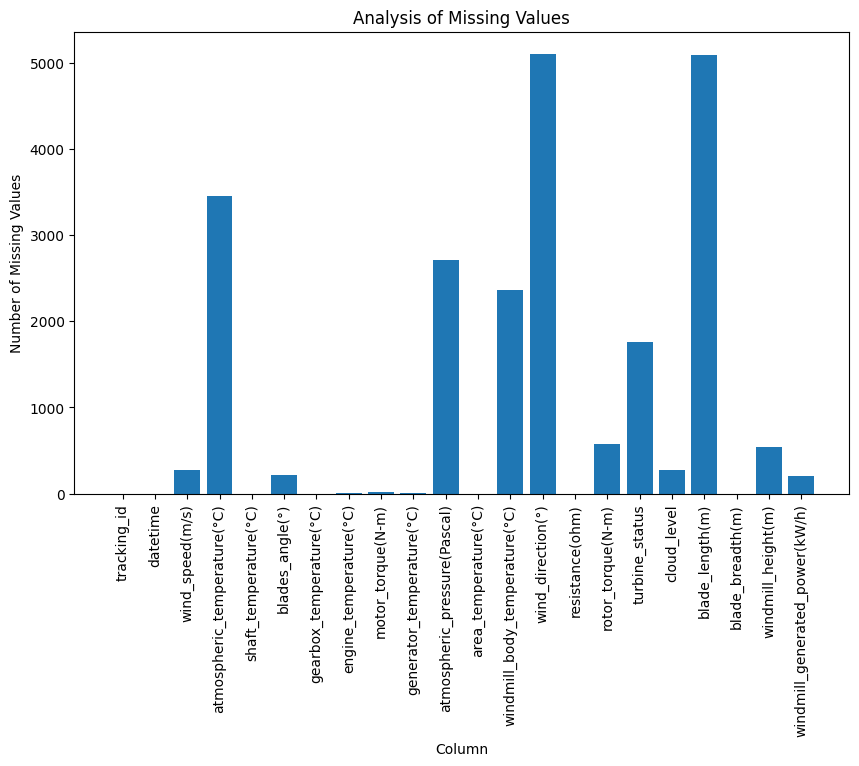

In [10]:
# Bar plot analysis of missing values column
plt.figure(figsize=(10, 6))
plt.bar(missing_values.index, missing_values.values)
plt.xlabel('Column')
# 45 degree angle of each x label
plt.xticks(rotation=90)
plt.ylabel('Number of Missing Values')
plt.title('Analysis of Missing Values')

# Correlation Matrix (Before Feature Extraction)

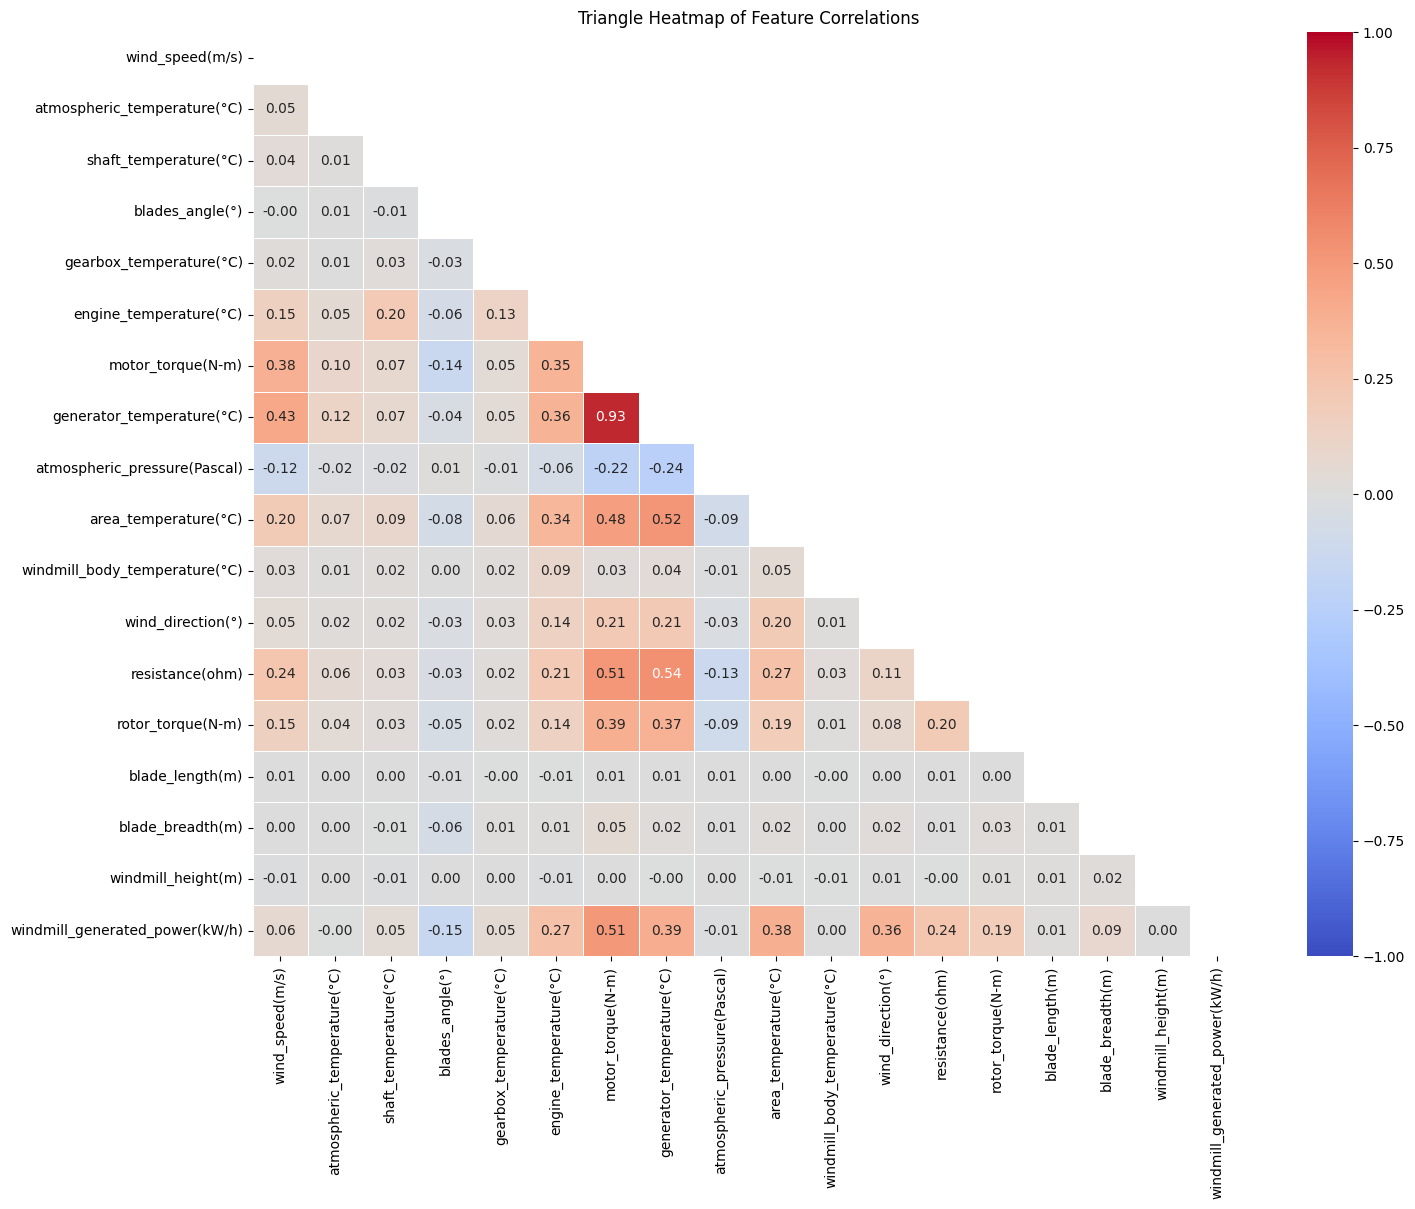

In [11]:
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, mask=mask)
plt.title('Triangle Heatmap of Feature Correlations')
plt.show()

# Univariate Analysis for Categorical Features

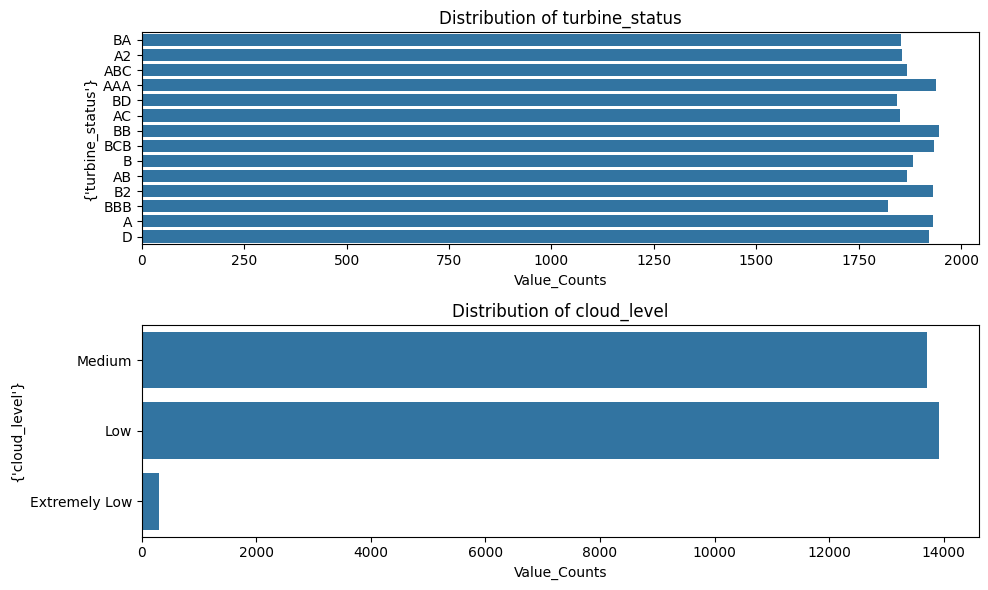

In [12]:
# Set up the matplotlib figure
plt.figure(figsize=(10, 6))

# Univariate Analysis: Bar plots for categorical features
categorical_features = ['turbine_status', 'cloud_level']

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 1, i)
    sns.countplot(y=df[feature])
    plt.title(f'Distribution of {feature}')
    plt.xlabel('Value_Counts')
    plt.ylabel({feature})

plt.tight_layout()
plt.show()

In [13]:
# Impute missing numerical values with the mean
numerical_cols = [
    'wind_speed(m/s)', 'atmospheric_temperature(°C)', 'shaft_temperature(°C)', 'blades_angle(°)',
    'gearbox_temperature(°C)', 'engine_temperature(°C)', 'motor_torque(N-m)', 'generator_temperature(°C)',
    'atmospheric_pressure(Pascal)', 'windmill_body_temperature(°C)', 'wind_direction(°)', 'resistance(ohm)',
    'rotor_torque(N-m)', 'blade_length(m)','blade_breadth(m)', 'windmill_height(m)', 'windmill_generated_power(kW/h)'
]

# Strip potential leading/trailing spaces from column names in the DataFrame
df.columns = df.columns.str.strip()

for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Impute missing categorical values with the mode
categorical_cols = ['turbine_status', 'cloud_level']

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check if there are any missing values left
missing_values_after_imputation = df.isnull().sum()

missing_values_after_imputation

tracking_id                       0
datetime                          0
wind_speed(m/s)                   0
atmospheric_temperature(°C)       0
shaft_temperature(°C)             0
blades_angle(°)                   0
gearbox_temperature(°C)           0
engine_temperature(°C)            0
motor_torque(N-m)                 0
generator_temperature(°C)         0
atmospheric_pressure(Pascal)      0
area_temperature(°C)              0
windmill_body_temperature(°C)     0
wind_direction(°)                 0
resistance(ohm)                   0
rotor_torque(N-m)                 0
turbine_status                    0
cloud_level                       0
blade_length(m)                   0
blade_breadth(m)                  0
windmill_height(m)                0
windmill_generated_power(kW/h)    0
dtype: int64

# Feature Engineering ( Air Density, turbine_area,turbine_efficiency)

In [14]:
# Air density
# Constants
R = 287.05  # specific gas constant for dry air, J/(kg·K)

# Convert temperature from Celsius to Kelvin
df['atmospheric_temperature(K)'] = df['atmospheric_temperature(°C)'] + 273.15

# Calculate air density (kg/m³)
df['air_density'] = df['atmospheric_pressure(Pascal)'] / (R * df['atmospheric_temperature(K)'])

In [15]:
# Calculate the turbine_area (swept area) in square meters
df['turbine_area'] = np.pi * (df['blade_length(m)'] ** 2)

In [16]:
# turbine_efficiency
# Calculate the theoretical wind power (W)
df['theoretical_wind_power'] = 0.5 * df['air_density'] * df['turbine_area'] * (df['wind_speed(m/s)'] ** 3)

# Convert theoretical wind power to kW (1 W = 0.001 kW)
df['theoretical_wind_power_kW'] = df['theoretical_wind_power'] * 0.001

# Calculate the efficiency
df['turbine_efficiency'] = (df['windmill_generated_power(kW/h)'] / df['theoretical_wind_power_kW']) * 100

# Handle any division by zero or infinity values
df['turbine_efficiency'].replace([np.inf, -np.inf], np.nan, inplace=True)
df['turbine_efficiency'].fillna(0, inplace=True)

In [17]:
# Drop the intermediate temperature column
df.drop(columns=['atmospheric_temperature(K)'], inplace=True)
df.drop(columns=['theoretical_wind_power'], inplace=True)
df.drop(columns=['theoretical_wind_power_kW'], inplace=True)

In [18]:
df.head()

tracking_id            datetime  wind_speed(m/s)  \
0    WM_33725 2019-08-04 14:33:20        94.820023   
1      WM_698 2018-11-05 10:13:20       241.832734   
2    WM_39146 2019-09-14 14:03:20        95.484724   
3     WM_6757 2018-12-25 15:33:20       238.819424   
4    WM_21521 2019-05-04 03:13:20        10.722890   

   atmospheric_temperature(°C)  shaft_temperature(°C)  blades_angle(°)  \
0                   -99.000000              41.723019        -0.903423   
1                    27.764785             -99.000000       -99.000000   
2                     0.383727              41.855473        12.652763   
3                   -99.000000              45.443914        15.115323   
4                     0.383727              41.981183         1.715696   

   gearbox_temperature(°C)  engine_temperature(°C)  motor_torque(N-m)  \
0                82.410573               42.523015        2563.124522   
1                44.104919               46.258870        2372.384119   
2                42.322098               42.878552        1657.169646   
3                44.759643               47.282101        2888.134079   
4               -17.616459               43.469852         781.695419   

   generator_temperature(°C)  ...  rotor_torque(N-m)  turbine_status  \
0                  76.665560  ...          42.084666              BA   
1                  78.129803  ...         107.888643              A2   
2                  67.654469  ...         -42.931459             ABC   
3                  95.389974  ...          42.744596             ABC   
4                  37.423065  ...          13.387289             AAA   

   cloud_level  blade_length(m)  blade_breadth(m)  windmill_height(m)  \
0       Medium         2.217542          0.314065           24.281689   
1       Medium         4.210346          0.448494           27.262139   
2       Medium         2.719475          0.302321           27.366127   
3          Low         4.857385          0.367140           24.287767   
4       Medium         2.254034          0.453374           27.971650   

  windmill_generated_power(kW/h) air_density  turbine_area  turbine_efficiency  
0                       6.766521    2.068483     15.448753            0.049676  
1                       5.966275    0.197168     55.691063            0.007684  
2                       2.874342    0.205379     23.233787            0.138385  
3                      14.851089    0.373871     74.123337            0.007869  
4                       3.519074    1.457862     15.961397           24.532148  

[5 rows x 25 columns]

# Correlation Matrix

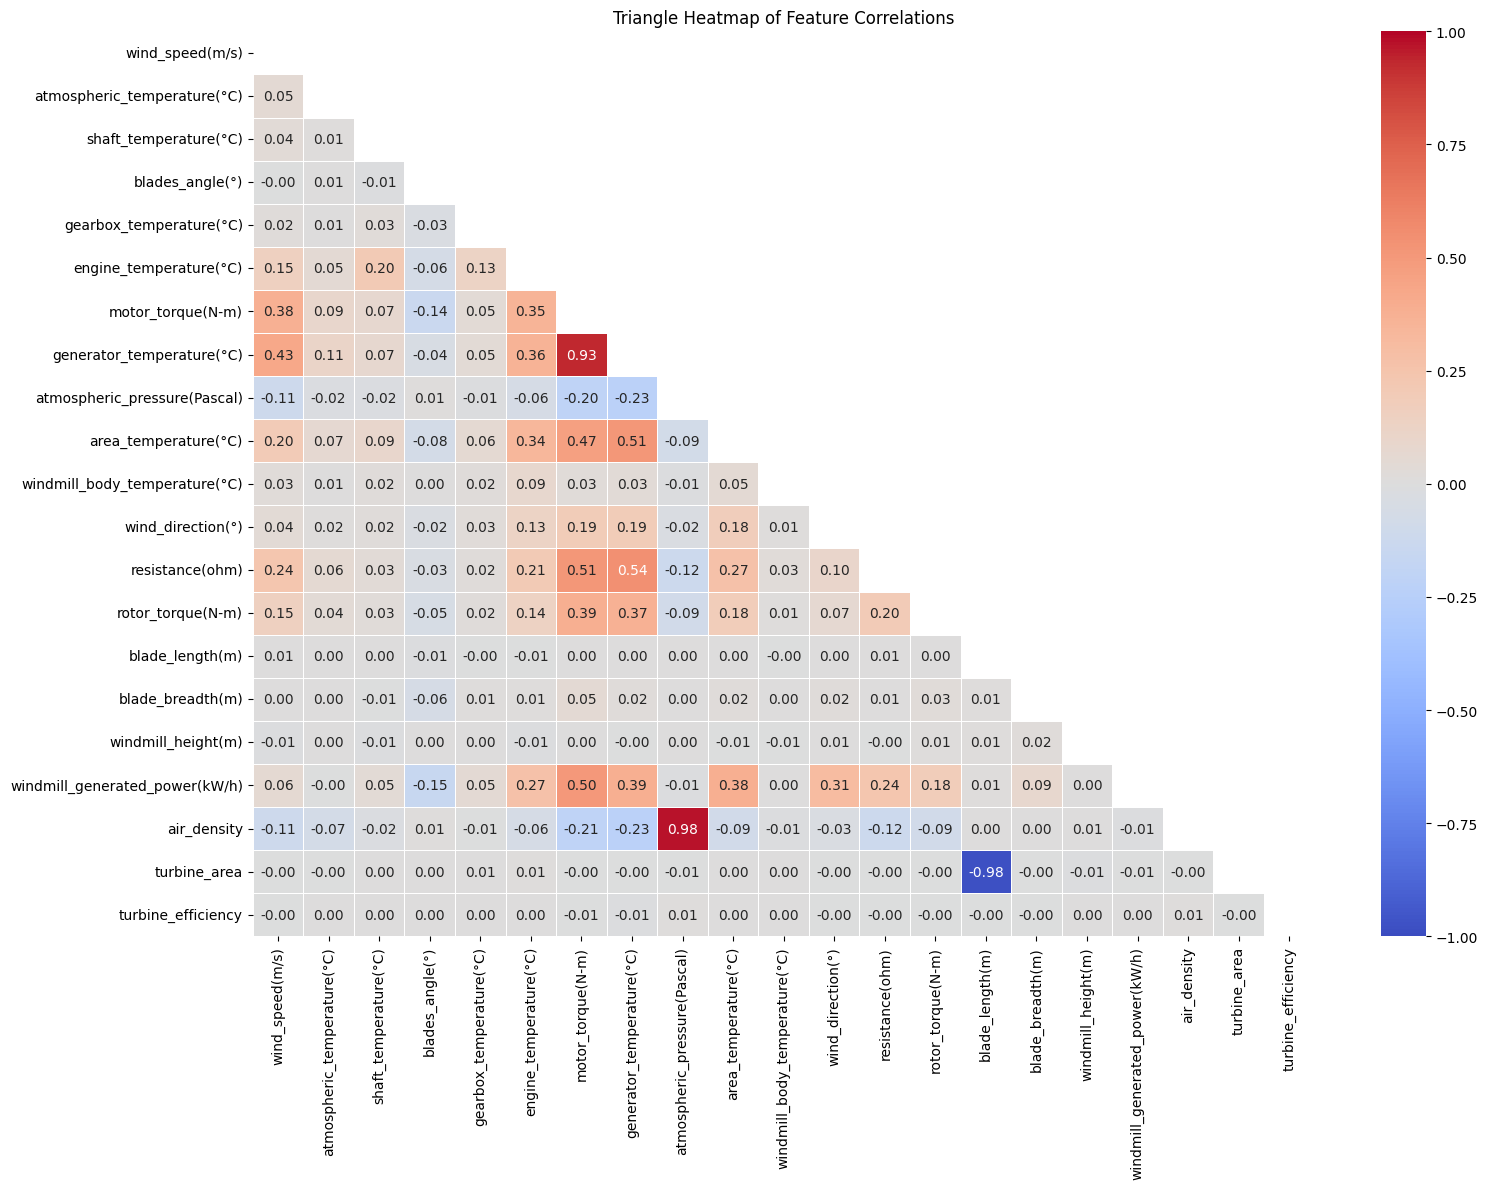

In [19]:
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numerical_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(16, 12))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5, mask=mask)
plt.title('Triangle Heatmap of Feature Correlations')
save_fig("Correlation-matrix")
plt.show()

# Univariate Analysis for Numerical Features

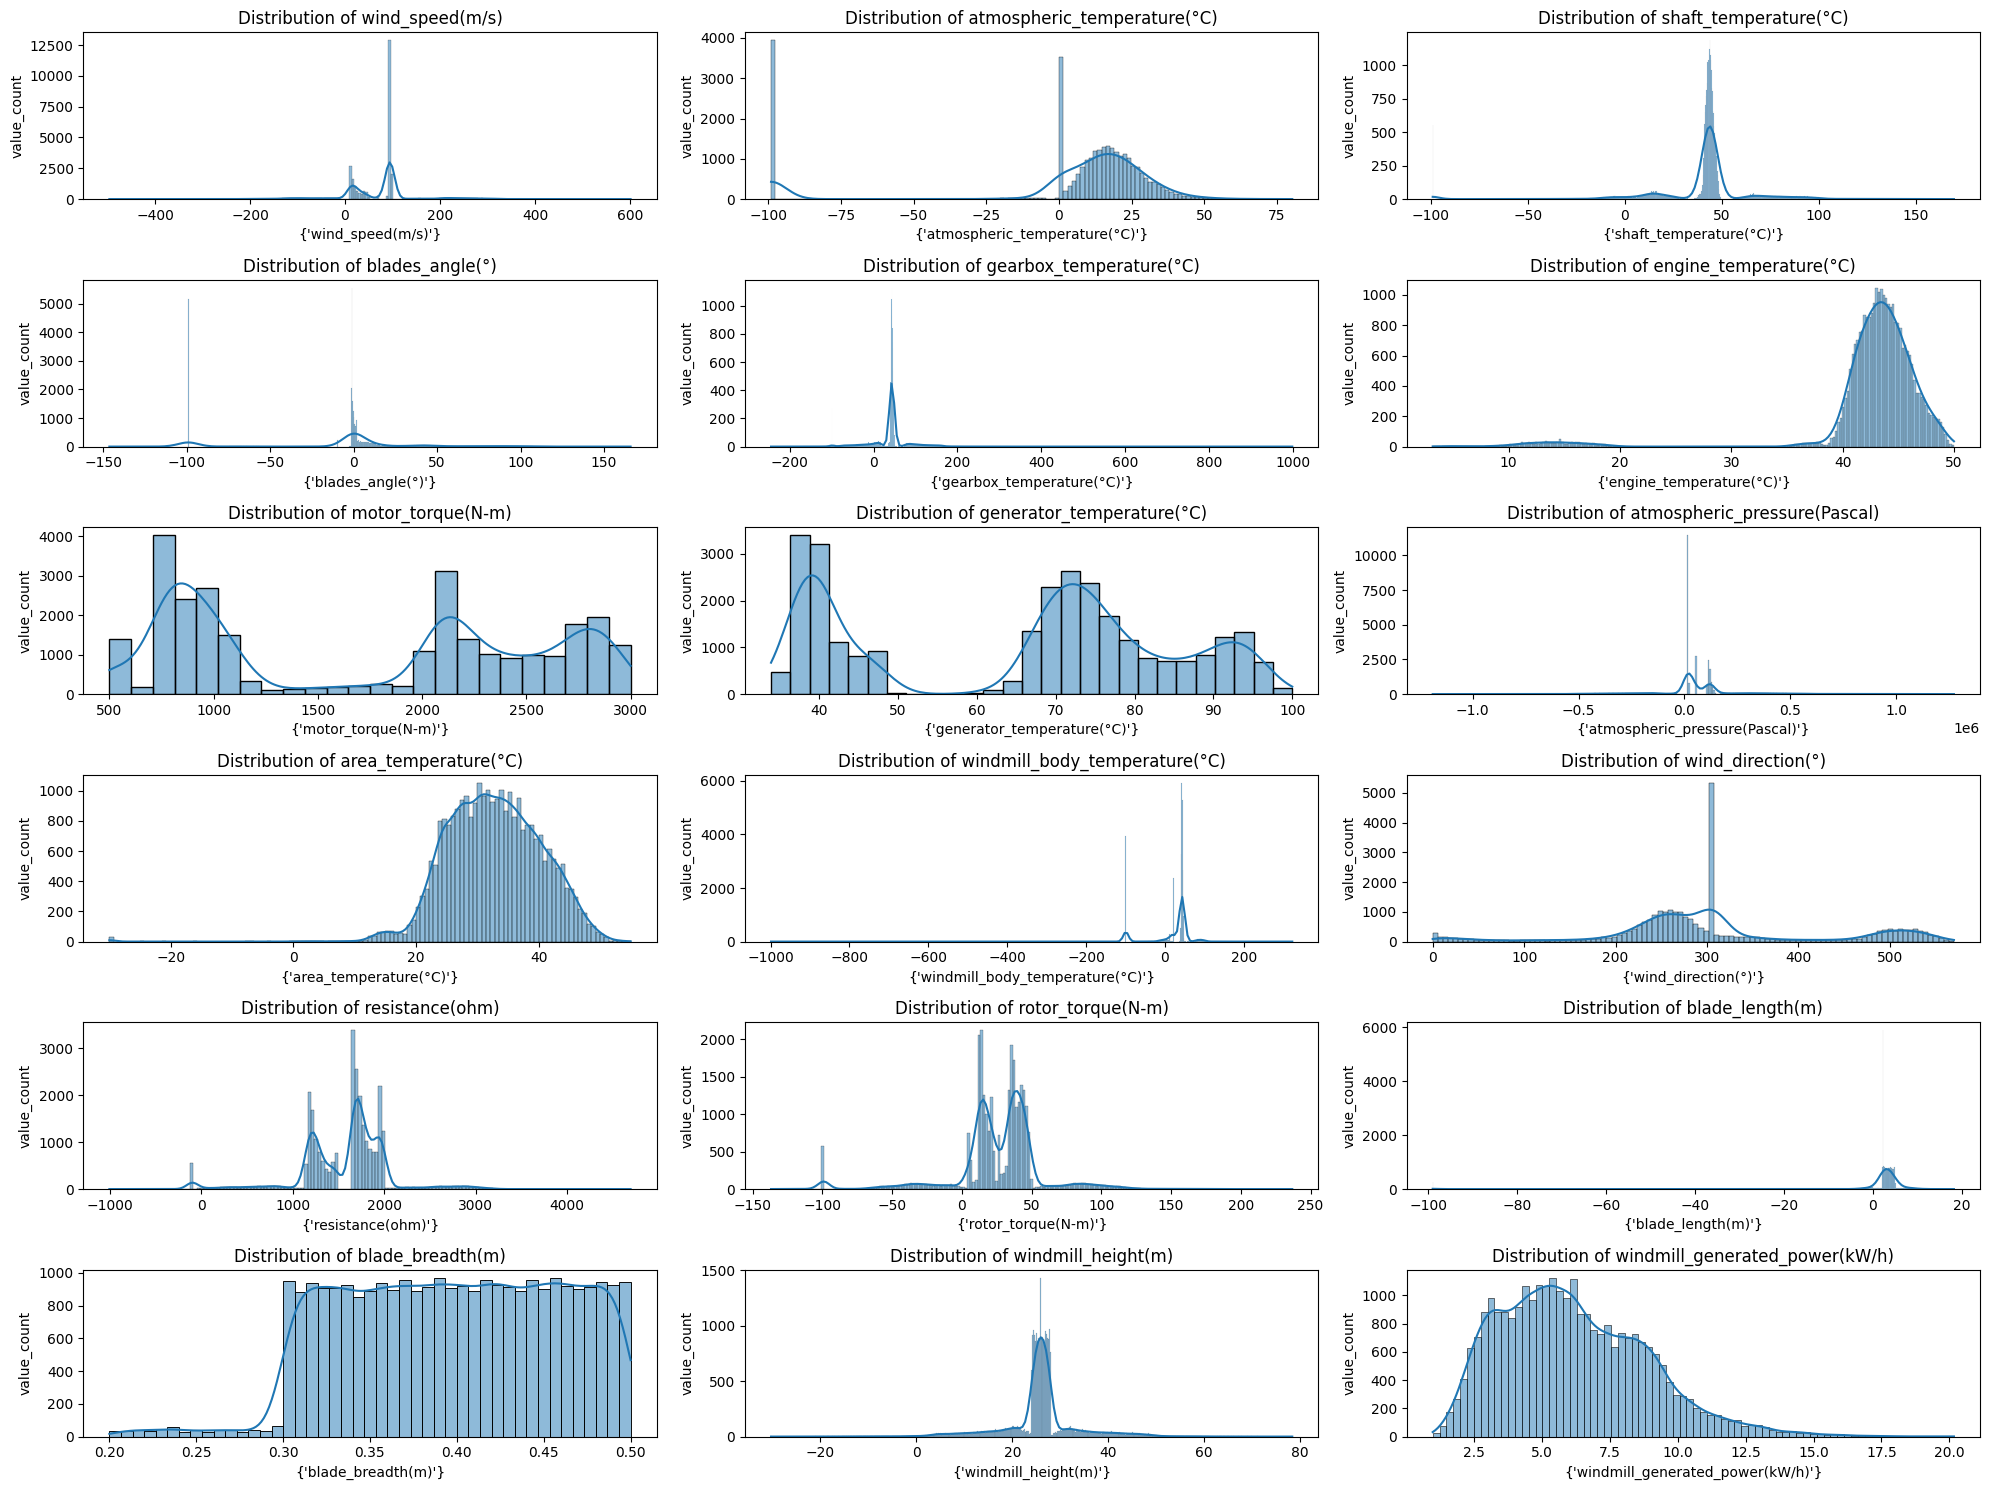

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# matplotlib figure
plt.figure(figsize=(20, 15))

# Univariate Analysis: Histograms for numerical features
numerical_features = [
    'wind_speed(m/s)', 'atmospheric_temperature(°C)', 'shaft_temperature(°C)', 'blades_angle(°)',
    'gearbox_temperature(°C)', 'engine_temperature(°C)', 'motor_torque(N-m)', 'generator_temperature(°C)',
    'atmospheric_pressure(Pascal)', 'area_temperature(°C)', 'windmill_body_temperature(°C)', 'wind_direction(°)',
    'resistance(ohm)', 'rotor_torque(N-m)', 'blade_length(m)', 'blade_breadth(m)', 'windmill_height(m)', 'windmill_generated_power(kW/h)'
]

for i, feature in enumerate(numerical_features, 1):
    plt.subplot(6, 3, i)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')

    plt.xlabel({feature})
    plt.ylabel('value_count')

plt.tight_layout()
save_fig("univariate-analysis")
plt.show()

## Scatter plot between 'wind_speed(m/s)' and 'windmill_generated_power(kW/h)'

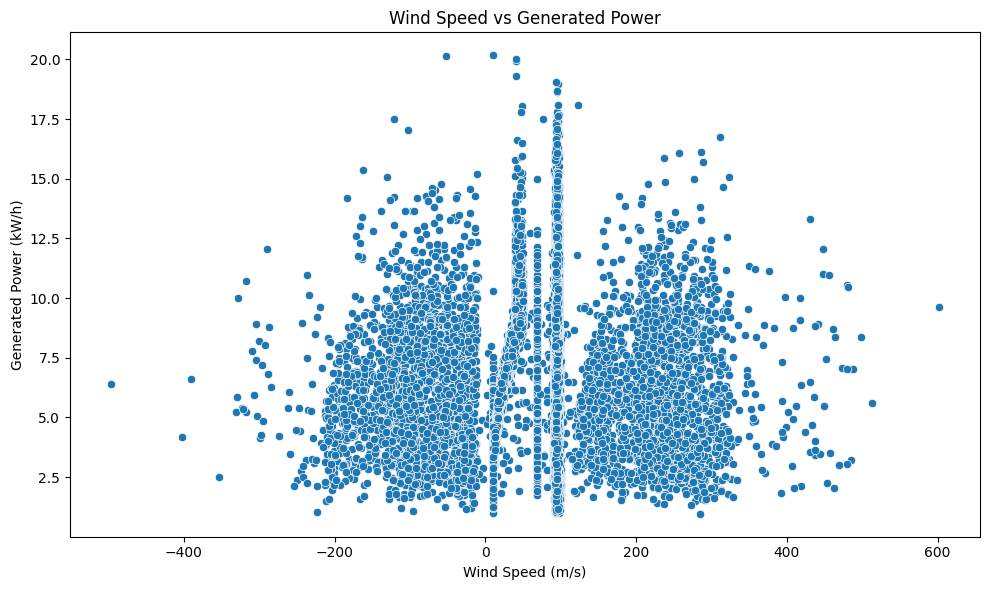

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['wind_speed(m/s)'], y=df['windmill_generated_power(kW/h)'])
plt.title('Wind Speed vs Generated Power')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Generated Power (kW/h)')
save_fig("Wind Speed vs Generated Power")
plt.show()

## Box plot of 'windmill_generated_power(kW/h)' across different 'turbine_status'

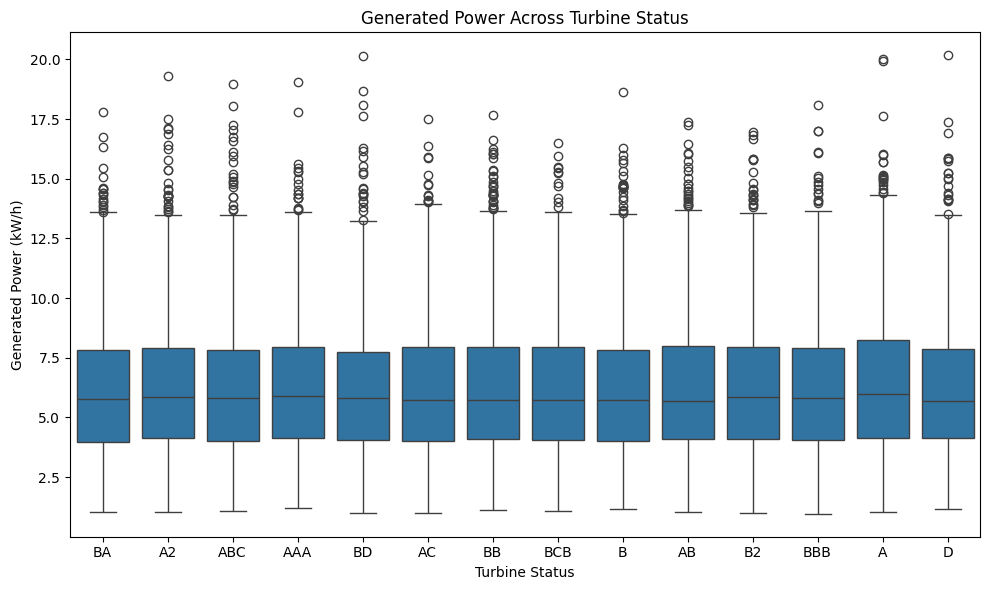

In [22]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='turbine_status', y='windmill_generated_power(kW/h)', data=df)
plt.title('Generated Power Across Turbine Status')
plt.xlabel('Turbine Status')
plt.ylabel('Generated Power (kW/h)')
save_fig("Generated Power Across Turbine Status")
plt.show()

##  Box plot of 'windmill_generated_power(kW/h)' across different 'cloud_level'

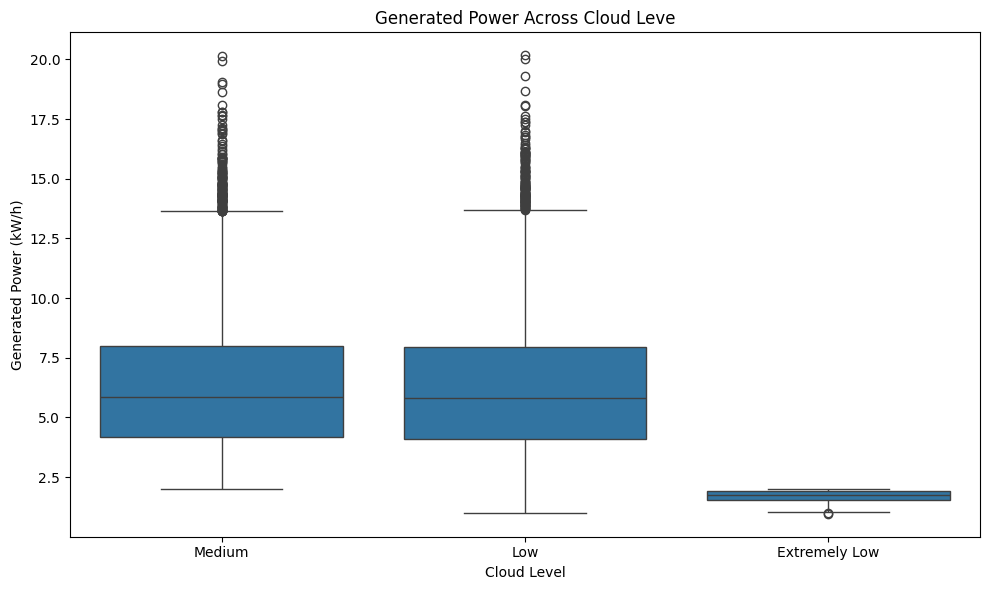

In [23]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cloud_level', y='windmill_generated_power(kW/h)', data=df)
plt.title('Generated Power Across Cloud Leve')
plt.xlabel('Cloud Level')
plt.ylabel('Generated Power (kW/h)')
save_fig("Generated Power Across Cloud Leve")
plt.show()

##  Scatter plot of 'atmospheric_temperature(°C)' vs windmill_generated_power(kW/h)

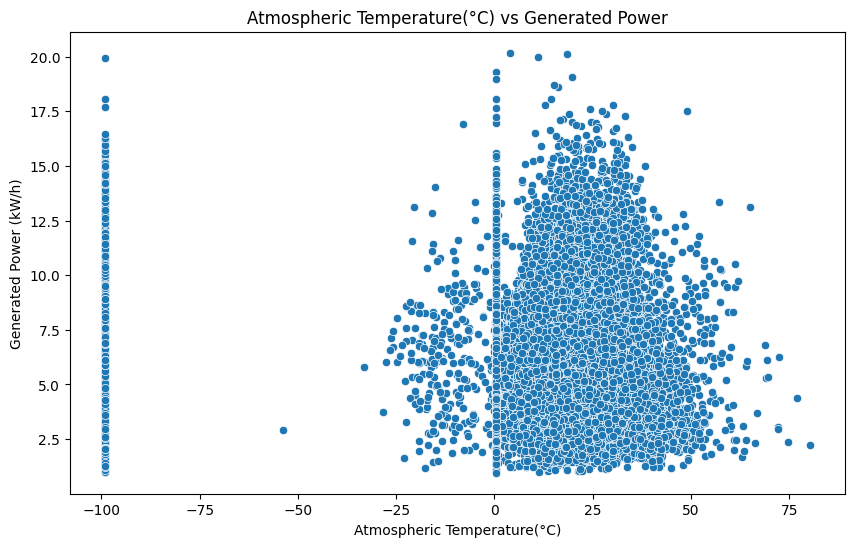

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['atmospheric_temperature(°C)'], y=df['windmill_generated_power(kW/h)'])
plt.title('Atmospheric Temperature(°C) vs Generated Power')
plt.xlabel('Atmospheric Temperature(°C)')
plt.ylabel('Generated Power (kW/h)')
plt.show()

 ## Scatter plot between 'shaft_temperature(°C)' and 'windmill_generated_power(kW/h)'

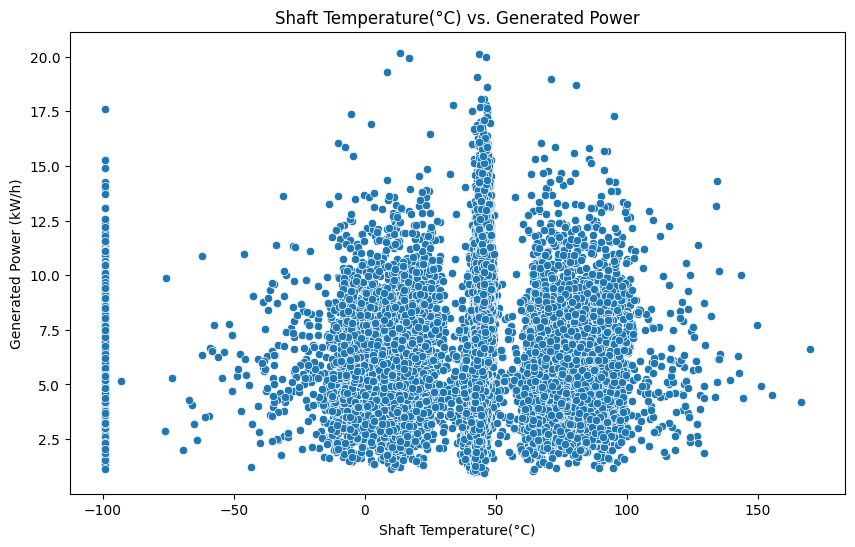

In [25]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['shaft_temperature(°C)'], y=df['windmill_generated_power(kW/h)'])
plt.title('Shaft Temperature(°C) vs. Generated Power')
plt.xlabel('Shaft Temperature(°C)')
plt.ylabel('Generated Power (kW/h)')
plt.show()

##  Scatter plot between 'blades_angle(°)' and 'windmill_generated_power(kW/h)'

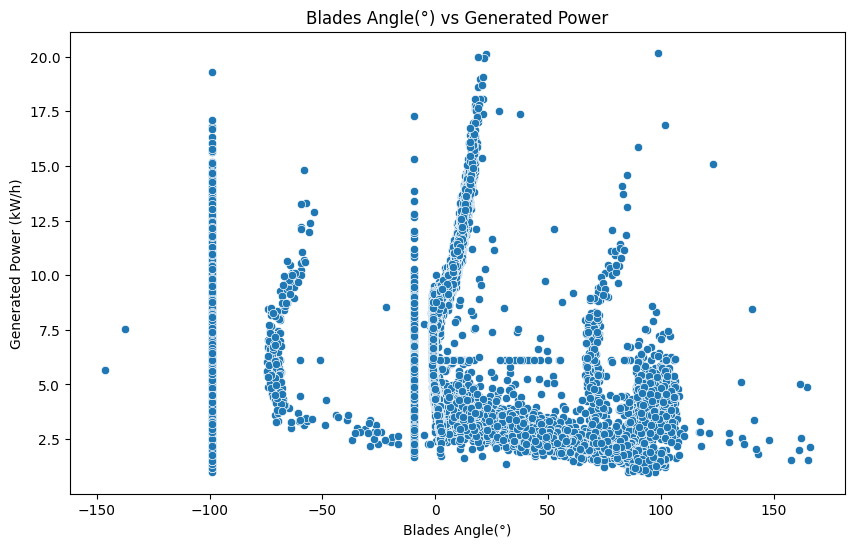

In [26]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['blades_angle(°)'], y=df['windmill_generated_power(kW/h)'])
plt.title('Blades Angle(°) vs Generated Power')
plt.xlabel('Blades Angle(°)')
plt.ylabel('Generated Power (kW/h)')
plt.show()

## Scatter plot between gearbox_temperature(°C)' and 'windmill_generated_power(kW/h)'

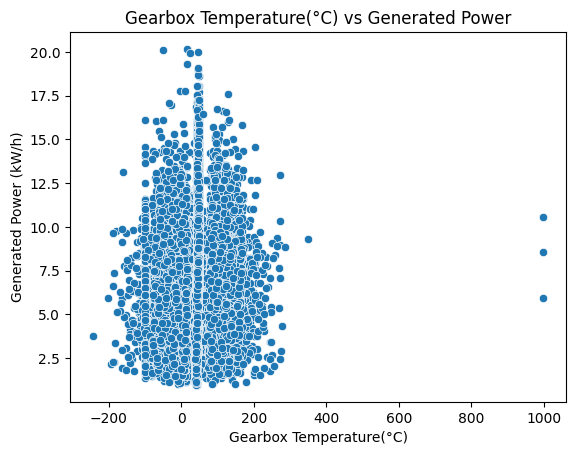

In [27]:
sns.scatterplot(x=df['gearbox_temperature(°C)'], y=df['windmill_generated_power(kW/h)'])
plt.title('Gearbox Temperature(°C) vs Generated Power')
plt.xlabel('Gearbox Temperature(°C)')
plt.ylabel('Generated Power (kW/h)')
plt.show()

##  Scatter plot between engine_temperature(°C)' and 'windmill_generated_power(kW/h)'

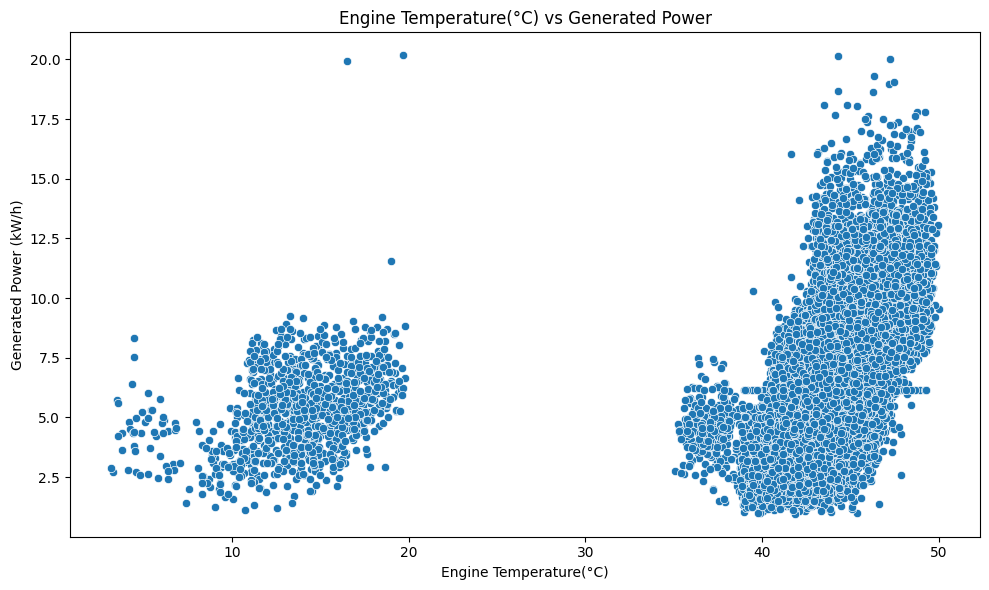

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['engine_temperature(°C)'], y=df['windmill_generated_power(kW/h)'])
plt.title('Engine Temperature(°C) vs Generated Power')
plt.xlabel('Engine Temperature(°C)')
plt.ylabel('Generated Power (kW/h)')
save_fig("Engine Temperature vs Generated Power")
plt.show()

##  Scatter plot between motor_torque(N-m)' and 'windmill_generated_power(kW/h)'

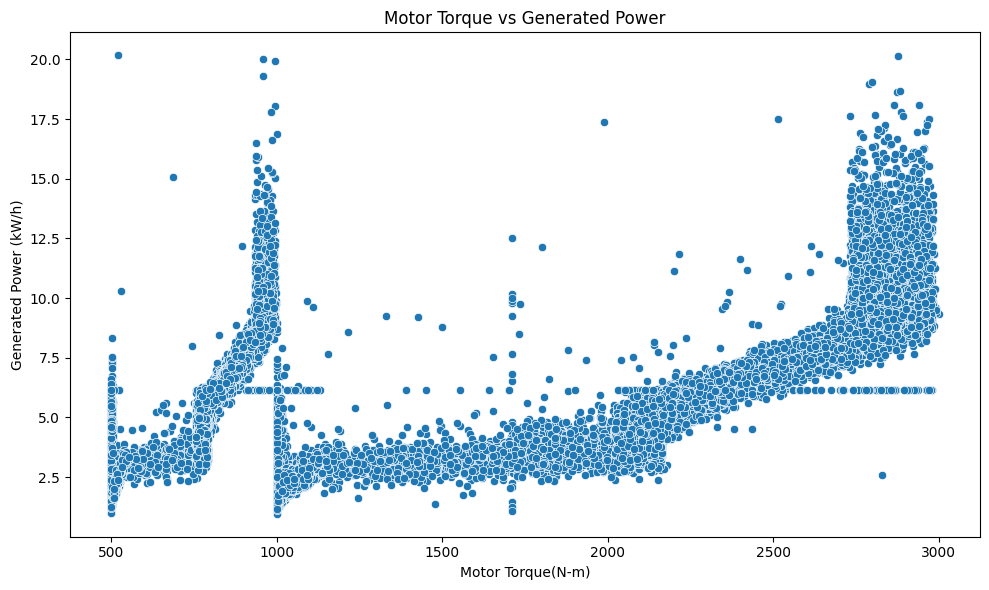

In [29]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['motor_torque(N-m)'], y=df['windmill_generated_power(kW/h)'])
plt.title('Motor Torque vs Generated Power')
plt.xlabel('Motor Torque(N-m)')
plt.ylabel('Generated Power (kW/h)')
save_fig("Motor Torque vs Generated Power")
plt.show()

##  Scatter plot between generator_temperature(°C)' and 'windmill_generated_power(kW/h)'

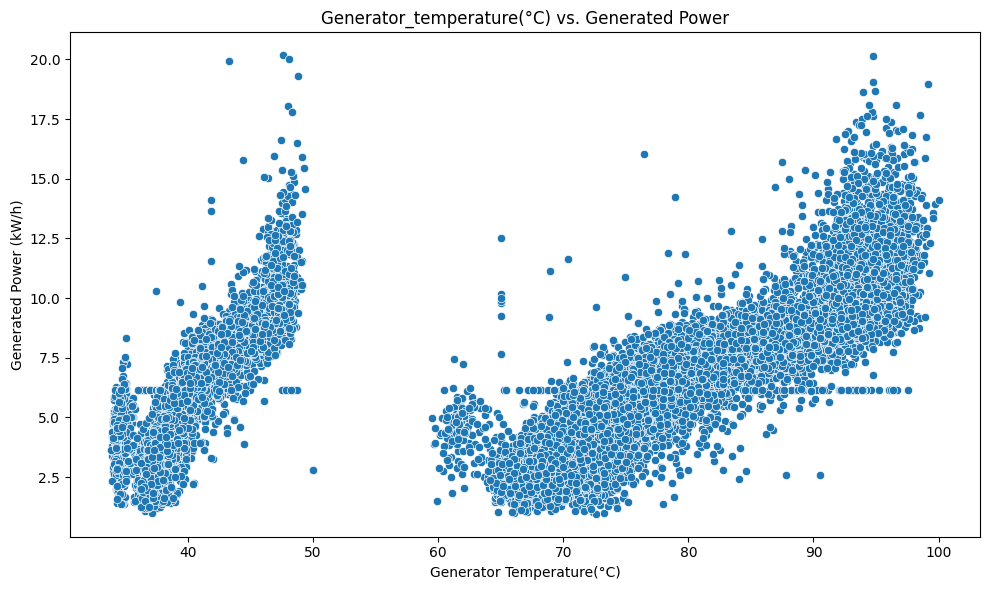

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['generator_temperature(°C)'], y=df['windmill_generated_power(kW/h)'])
plt.title('Generator_temperature(°C) vs. Generated Power')
plt.xlabel('Generator Temperature(°C)')
plt.ylabel('Generated Power (kW/h)')
save_fig("Generator temperature vs Generated Power")
plt.show()

 ## Scatter plot between atmospheric_pressure(Pascal) ' and 'windmill_generated_power(kW/h)'

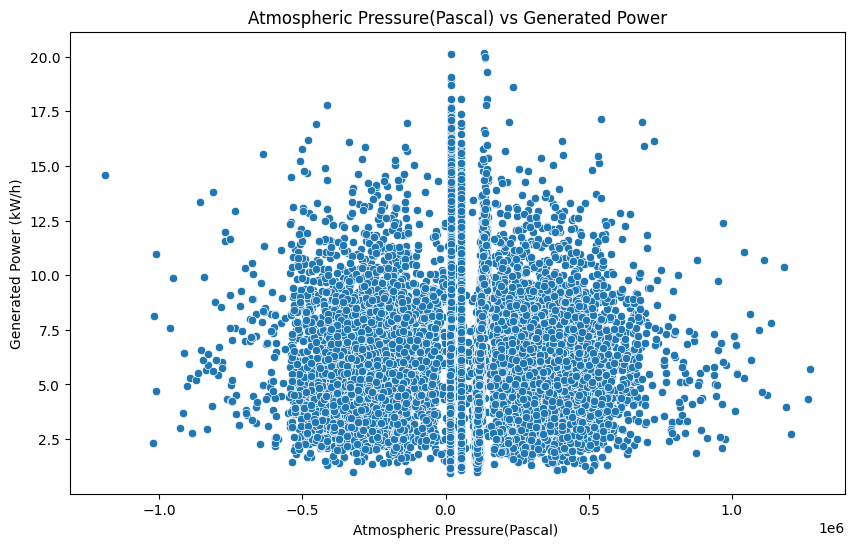

In [31]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['atmospheric_pressure(Pascal)'], y=df['windmill_generated_power(kW/h)'])
plt.title('Atmospheric Pressure(Pascal) vs Generated Power')
plt.xlabel('Atmospheric Pressure(Pascal) ')
plt.ylabel('Generated Power (kW/h)')
plt.show()

## Scatter plot between area_temperature(°C) ' and 'windmill_generated_power(kW/h)'

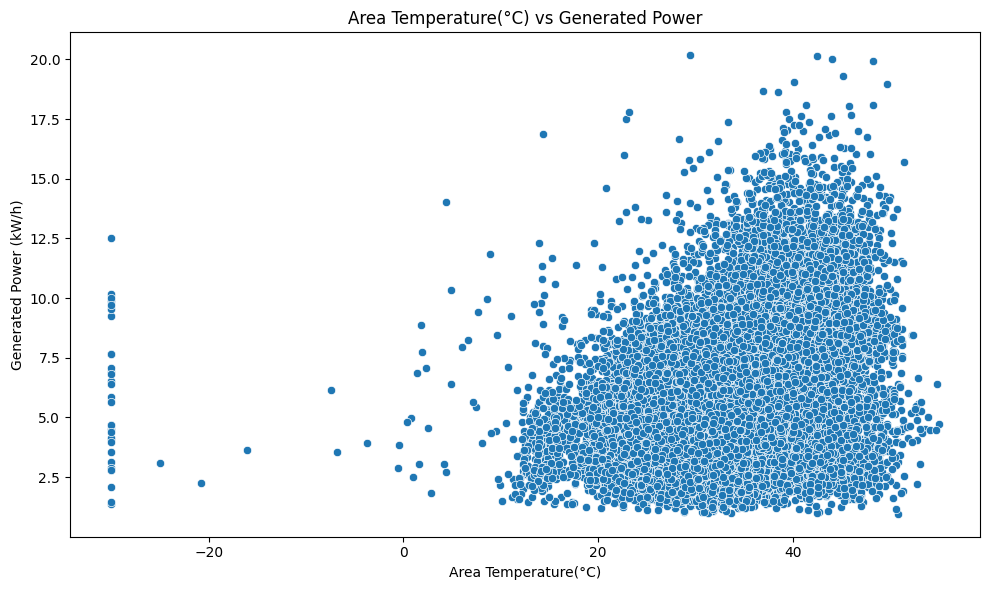

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['area_temperature(°C)'], y=df['windmill_generated_power(kW/h)'])
plt.title('Area Temperature(°C) vs Generated Power')
plt.xlabel('Area Temperature(°C)')
plt.ylabel('Generated Power (kW/h)')
save_fig("Area Temperature vs Generated Power")
plt.show()

##  Scatter plot between  windmill_body_temperature(°C)' and 'windmill_generated_power(kW/h)'

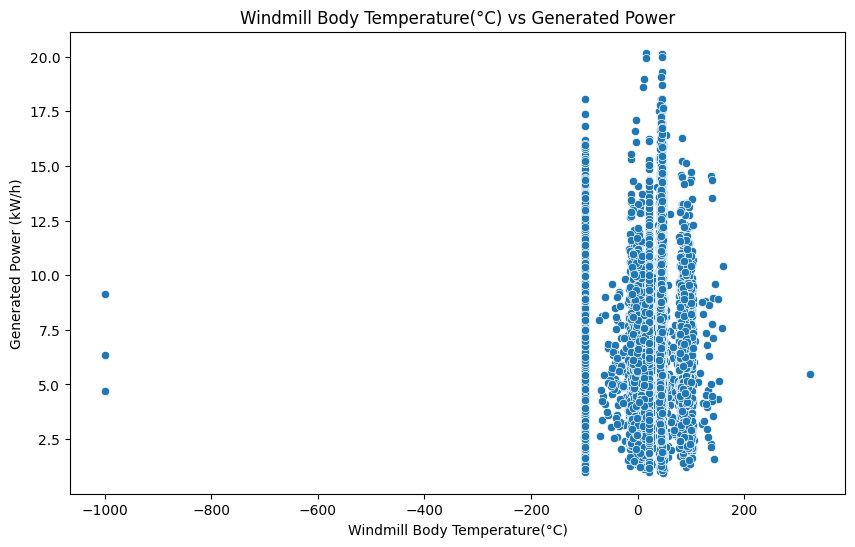

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['windmill_body_temperature(°C)'], y=df['windmill_generated_power(kW/h)'])
plt.title('Windmill Body Temperature(°C) vs Generated Power')
plt.xlabel('Windmill Body Temperature(°C)')
plt.ylabel('Generated Power (kW/h)')
plt.show()

##  Scatter plot between  windmill_body_temperature(°C)' and 'windmill_generated_power(kW/h)'

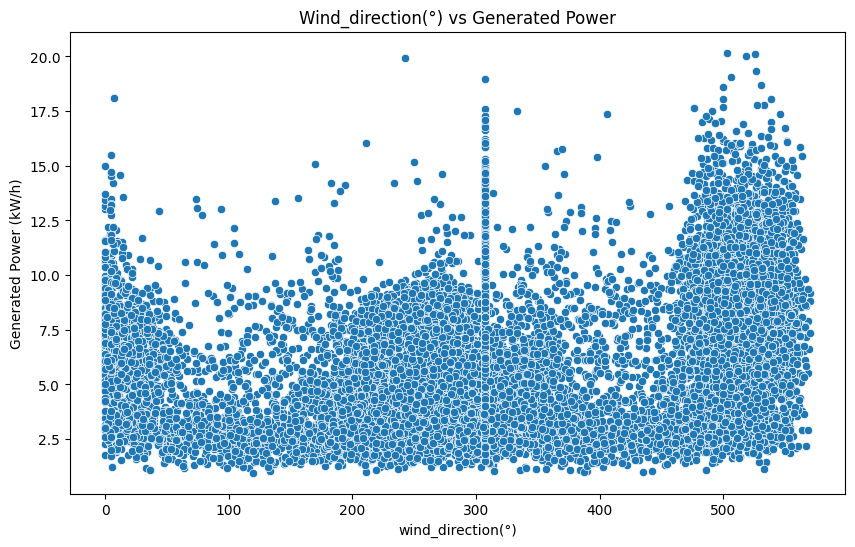

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['wind_direction(°)'], y=df['windmill_generated_power(kW/h)'])
plt.title('Wind_direction(°) vs Generated Power')
plt.xlabel('wind_direction(°)')
plt.ylabel('Generated Power (kW/h)')
plt.show()

##  Scatter plot between  resistance(ohm)' and 'windmill_generated_power(kW/h)'

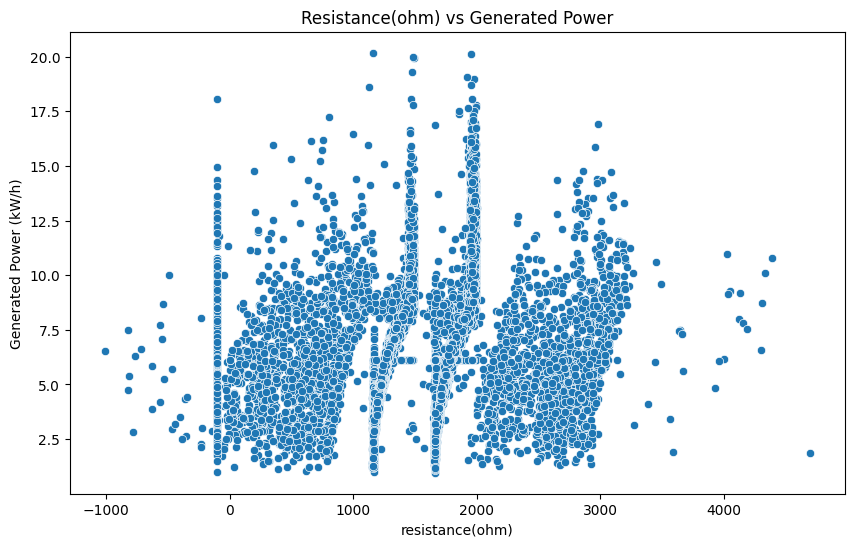

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['resistance(ohm)'], y=df['windmill_generated_power(kW/h)'])
plt.title('Resistance(ohm) vs Generated Power')
plt.xlabel('resistance(ohm)')
plt.ylabel('Generated Power (kW/h)')
plt.show()

 ## Scatter plot between  rotor_torque(N-m) ' and 'windmill_generated_power(kW/h)'

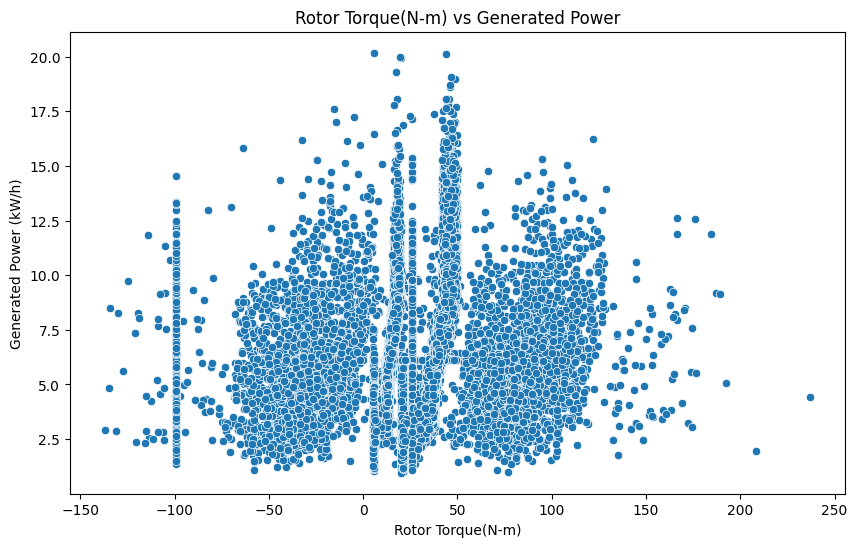

In [36]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['rotor_torque(N-m)'], y=df['windmill_generated_power(kW/h)'])
plt.title('Rotor Torque(N-m) vs Generated Power')
plt.xlabel('Rotor Torque(N-m)')
plt.ylabel('Generated Power (kW/h)')
plt.show()

##  Scatter plot between  blade_length(m) ' and 'windmill_generated_power(kW/h)'

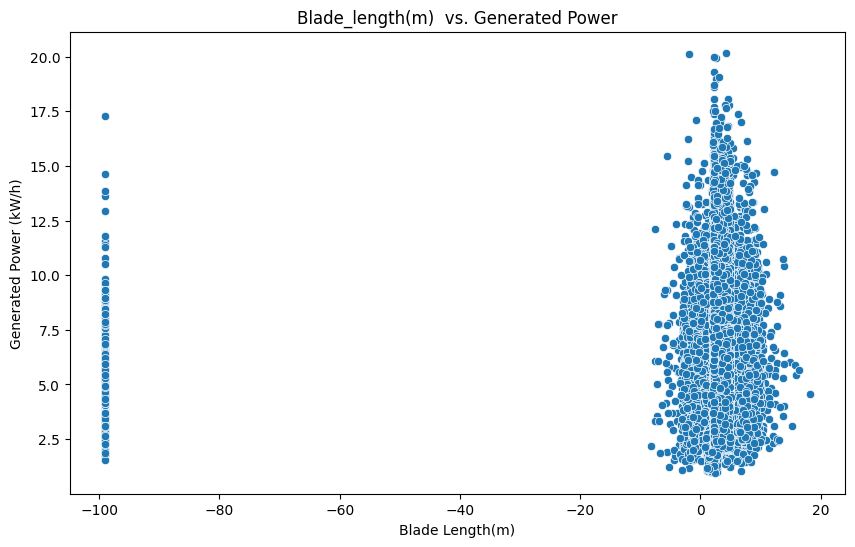

In [37]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['blade_length(m)'], y=df['windmill_generated_power(kW/h)'])
plt.title('Blade_length(m)  vs. Generated Power')
plt.xlabel('Blade Length(m)')
plt.ylabel('Generated Power (kW/h)')
plt.show()

##  Scatter plot between  blade_breadth(m) ' and 'windmill_generated_power(kW/h)'

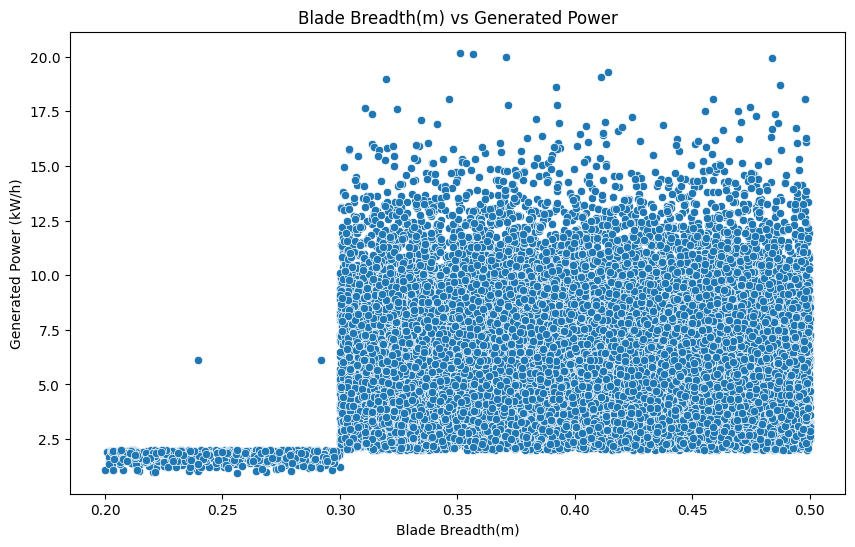

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['blade_breadth(m)'], y=df['windmill_generated_power(kW/h)'])
plt.title('Blade Breadth(m) vs Generated Power')
plt.xlabel('Blade Breadth(m)')
plt.ylabel('Generated Power (kW/h)')
plt.show()

##  Scatter plot between  windmill_height(m) ' and 'windmill_generated_power(kW/h)'

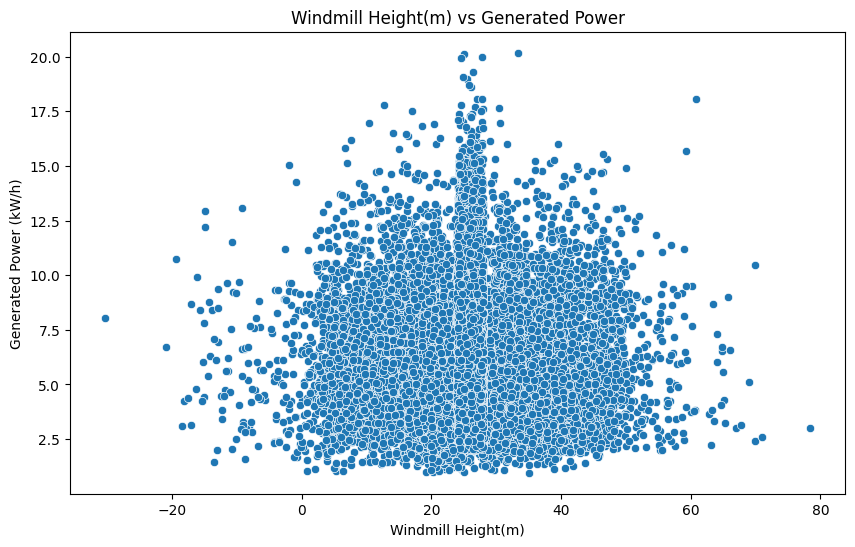

In [39]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['windmill_height(m)'], y=df['windmill_generated_power(kW/h)'])
plt.title('Windmill Height(m) vs Generated Power')
plt.xlabel('Windmill Height(m)')
plt.ylabel('Generated Power (kW/h)')
plt.show()

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28200 entries, 0 to 28199
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   tracking_id                     28200 non-null  object        
 1   datetime                        28200 non-null  datetime64[ns]
 2   wind_speed(m/s)                 28200 non-null  float64       
 3   atmospheric_temperature(°C)     28200 non-null  float64       
 4   shaft_temperature(°C)           28200 non-null  float64       
 5   blades_angle(°)                 28200 non-null  float64       
 6   gearbox_temperature(°C)         28200 non-null  float64       
 7   engine_temperature(°C)          28200 non-null  float64       
 8   motor_torque(N-m)               28200 non-null  float64       
 9   generator_temperature(°C)       28200 non-null  float64       
 10  atmospheric_pressure(Pascal)    28200 non-null  float64       
 11  ar

## Scatter plot between 'air_density' and 'windmill_generated_power(kW/h)'

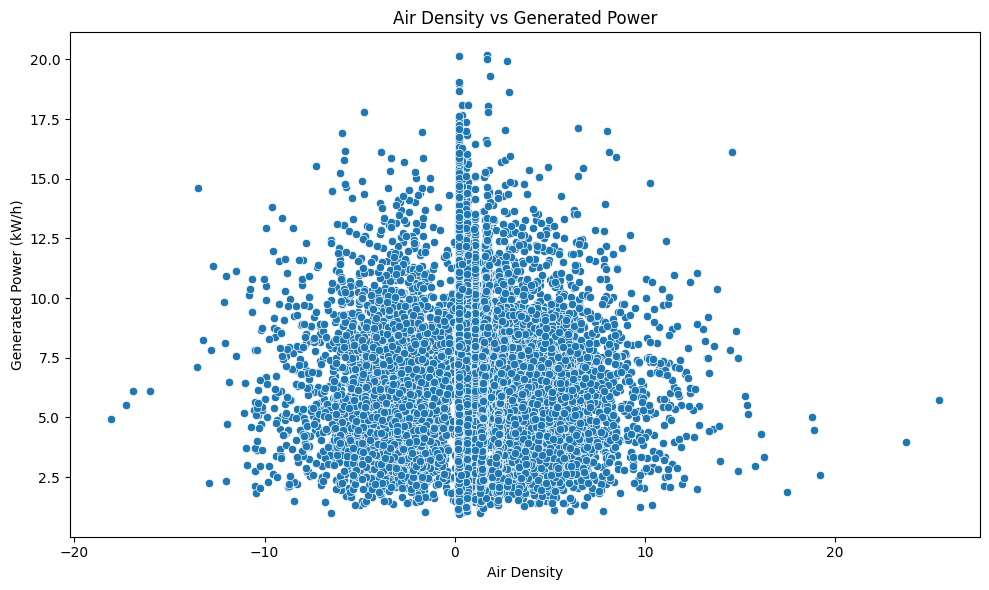

In [41]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['air_density'], y=df['windmill_generated_power(kW/h)'])
plt.title('Air Density vs Generated Power')
plt.xlabel('Air Density')
plt.ylabel('Generated Power (kW/h)')
save_fig("Air Density vs Generated Power")
plt.show()

## Scatter plot between 'turbine_area' and 'windmill_generated_power(kW/h)'

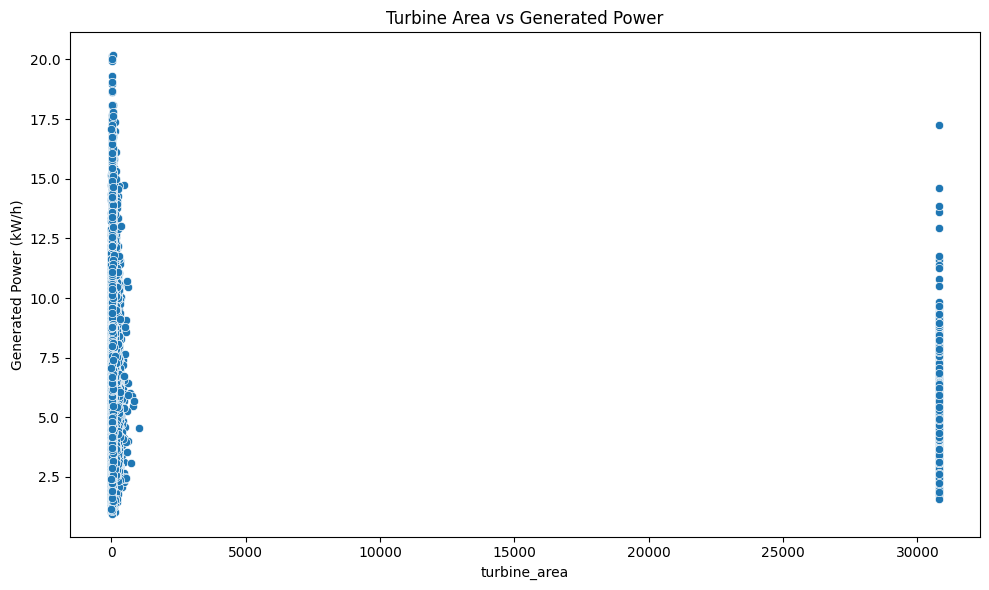

In [42]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['turbine_area'], y=df['windmill_generated_power(kW/h)'])
plt.title('Turbine Area vs Generated Power')
plt.xlabel('turbine_area')
plt.ylabel('Generated Power (kW/h)')
save_fig("Turbine Area vs Generated Power")
plt.show()

## Scatter plot between 'turbine_efficiency' and 'windmill_generated_power(kW/h)'

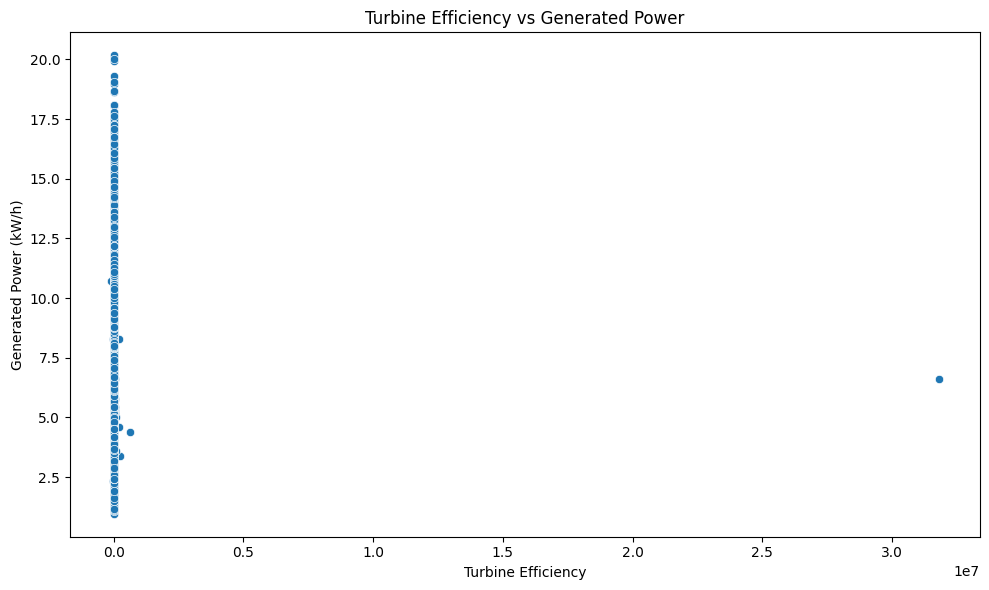

In [43]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['turbine_efficiency'], y=df['windmill_generated_power(kW/h)'])
plt.title('Turbine Efficiency vs Generated Power')
plt.xlabel('Turbine Efficiency')
plt.ylabel('Generated Power (kW/h)')
save_fig("Turbine Efficiency vs Generated Power")
plt.show()

## Plotting the time series for selected features

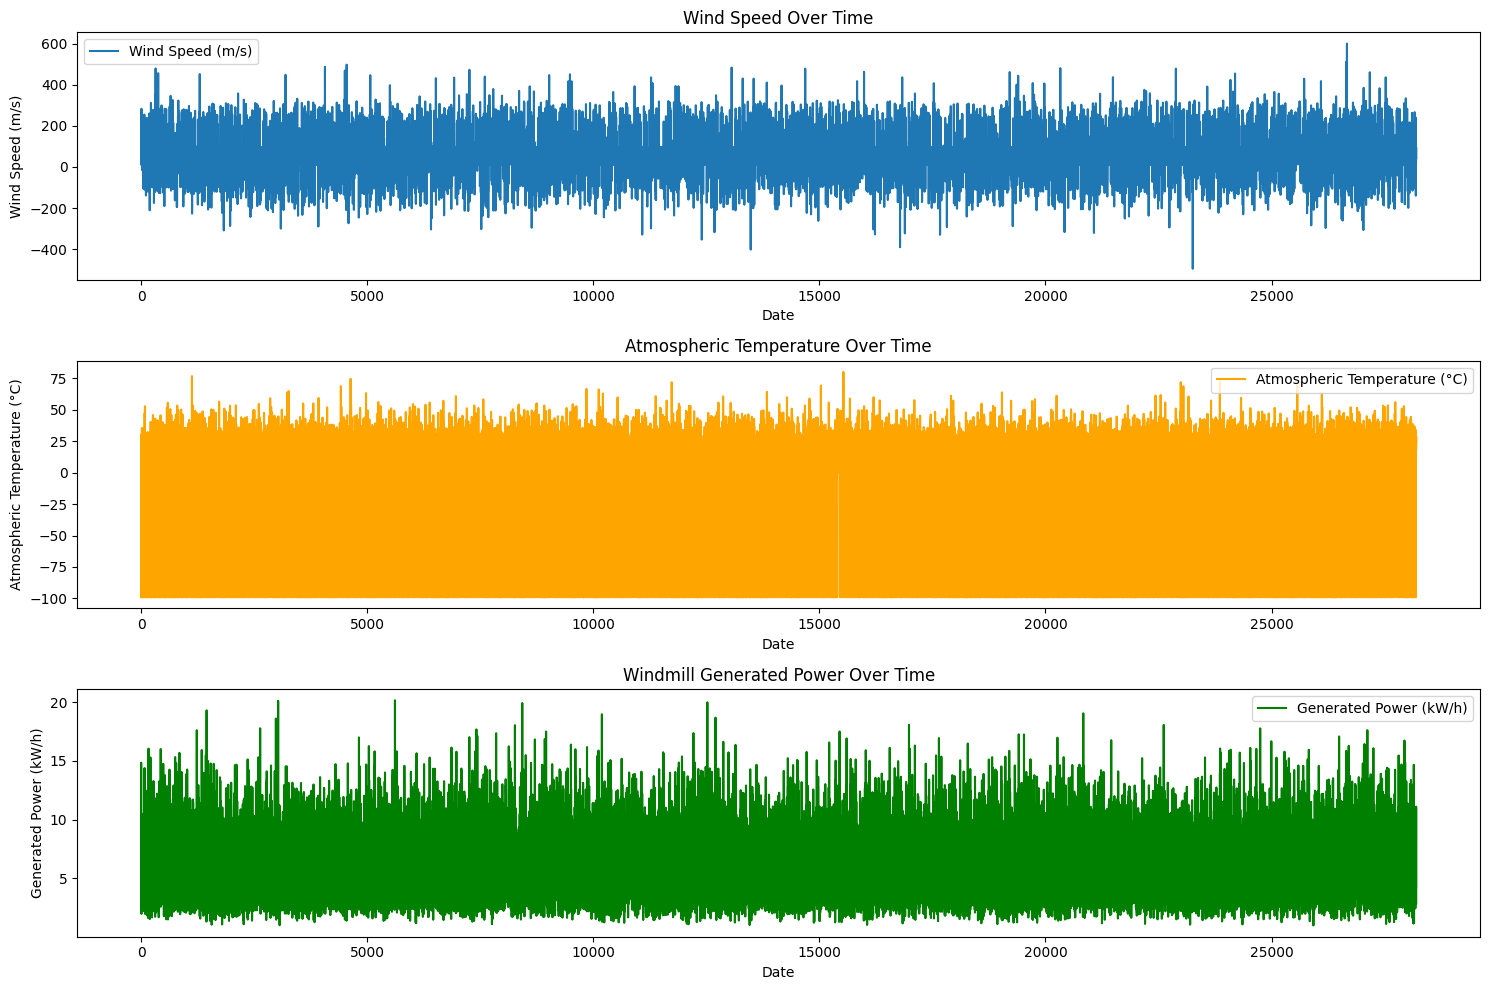

In [44]:
plt.figure(figsize=(15, 10))

# Plot wind speed
plt.subplot(3, 1, 1)
plt.plot(df.index, df['wind_speed(m/s)'], label='Wind Speed (m/s)')
plt.title('Wind Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Wind Speed (m/s)')
plt.legend()

# Plot atmospheric temperature
plt.subplot(3, 1, 2)
plt.plot(df.index, df['atmospheric_temperature(°C)'], label='Atmospheric Temperature (°C)', color='orange')
plt.title('Atmospheric Temperature Over Time')
plt.xlabel('Date')
plt.ylabel('Atmospheric Temperature (°C)')
plt.legend()

# Plot windmill generated power
plt.subplot(3, 1, 3)
plt.plot(df.index, df['windmill_generated_power(kW/h)'], label='Generated Power (kW/h)', color='green')
plt.title('Windmill Generated Power Over Time')
plt.xlabel('Date')
plt.ylabel('Generated Power (kW/h)')
plt.legend()

plt.tight_layout()
save_fig("Time-series-plot")
plt.show()

## Top 5 Feature Analysis

In [45]:
# Select only numerical columns for correlation calculation
numerical_df = df.select_dtypes(include=['number'])


# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Get the correlation values for 'windmill_generated_power(kW/h)'
correlation_with_power = correlation_matrix['windmill_generated_power(kW/h)']

# Drop the correlation of 'windmill_generated_power(kW/h)' with itself
correlation_with_power = correlation_with_power.drop('windmill_generated_power(kW/h)')

# Find the top 5 features most correlated with 'windmill_generated_power(kW/h)'
top_5_features = correlation_with_power.abs().nlargest(5).index

# Display the top 5 features
top_5_features, correlation_with_power[top_5_features]

(Index(['motor_torque(N-m)', 'generator_temperature(°C)',
        'area_temperature(°C)', 'wind_direction(°)', 'engine_temperature(°C)'],
       dtype='object'),
 motor_torque(N-m)            0.503155
 generator_temperature(°C)    0.390092
 area_temperature(°C)         0.383173
 wind_direction(°)            0.311539
 engine_temperature(°C)       0.271819
 Name: windmill_generated_power(kW/h), dtype: float64)

## Top Five Feature Plot

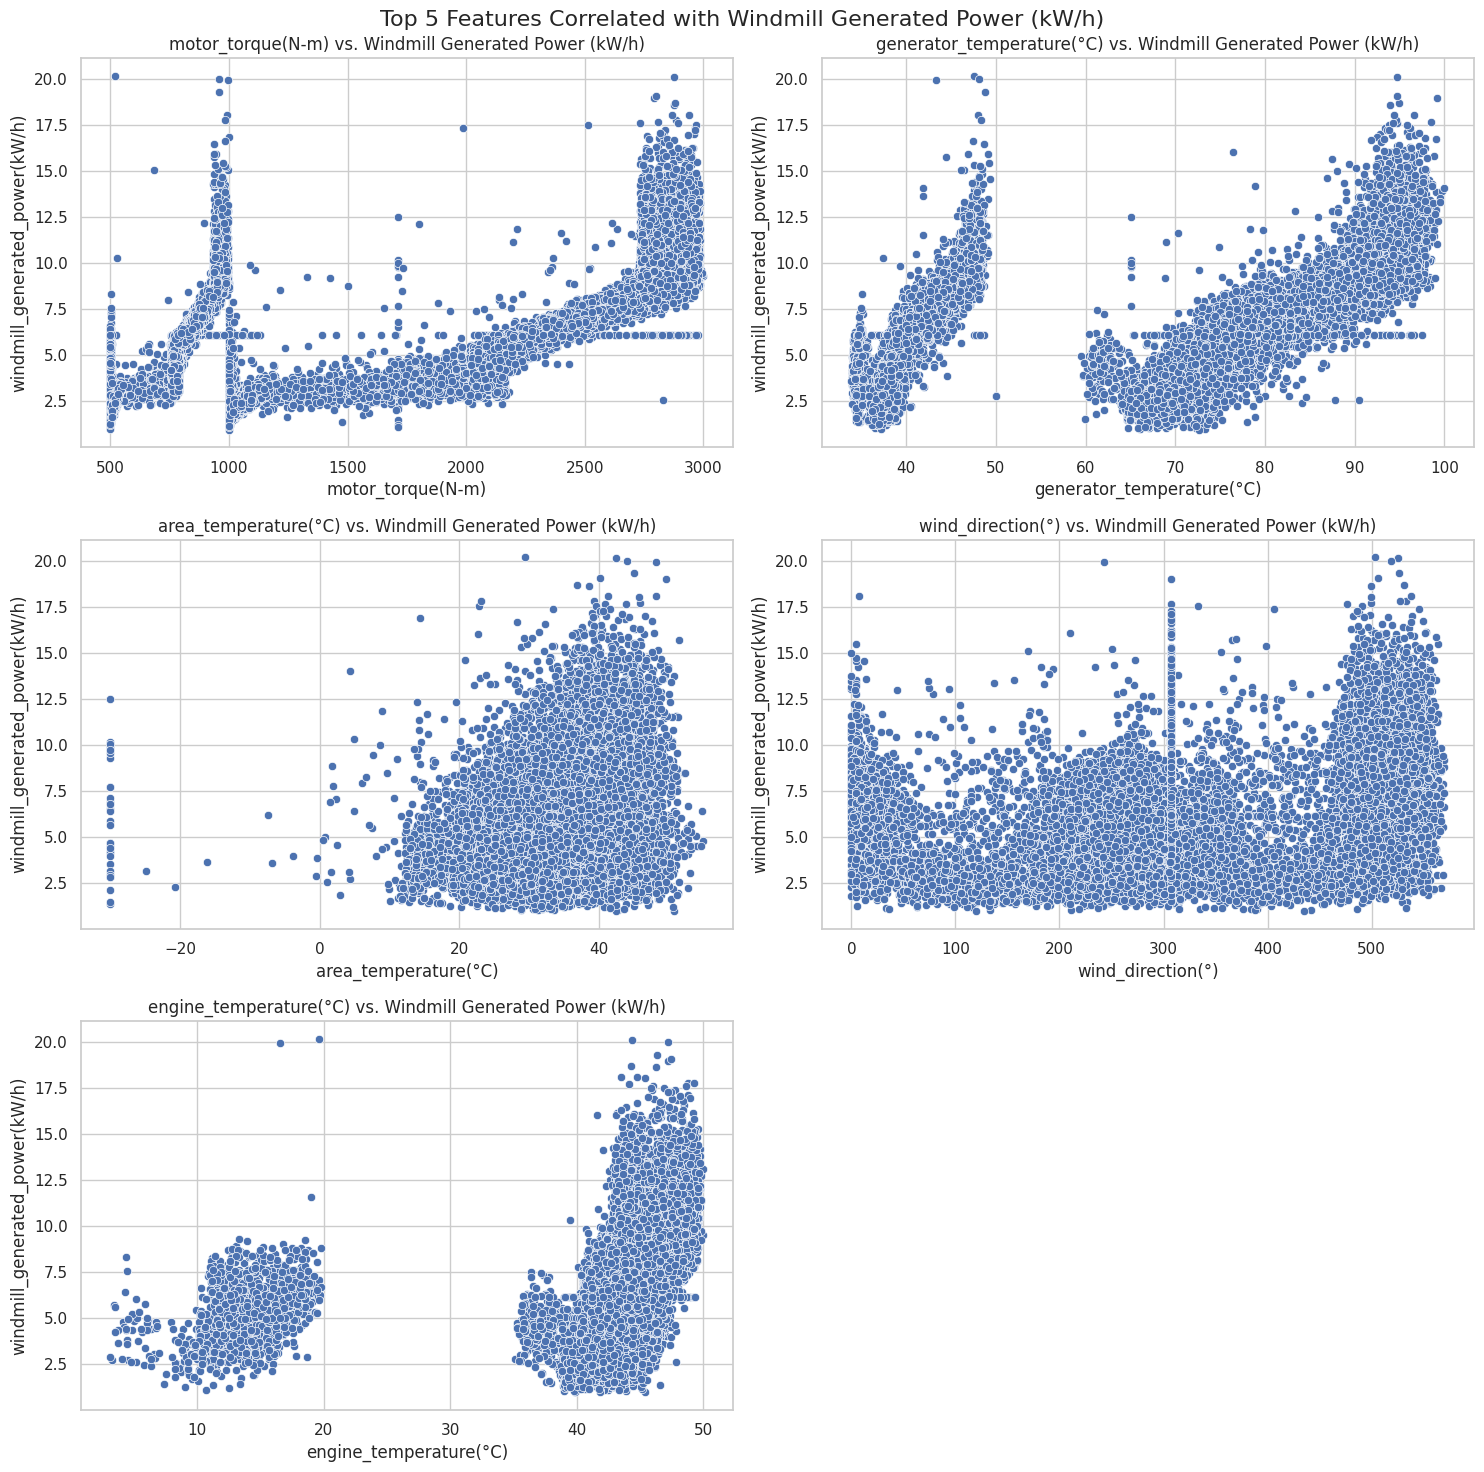

In [46]:
# Set the style of the visualization
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle('Top 5 Features Correlated with Windmill Generated Power (kW/h)', fontsize=16)

# List of the top 5 features
top_5_features_list = top_5_features.tolist()

# Plot each feature against 'windmill_generated_power(kW/h)'
for i, feature in enumerate(top_5_features_list):
    row, col = divmod(i, 2)
    sns.scatterplot(data=df, x=feature, y='windmill_generated_power(kW/h)', ax=axes[row, col])
    axes[row, col].set_title(f'{feature} vs. Windmill Generated Power (kW/h)')

# Remove the empty subplot if there's an odd number of features
fig.delaxes(axes[2][1])

# Adjust the layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
save_fig("Top 5 Features")
plt.show()

## Find Most Important Features Based On RandomForest Regressor

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

Number of NaN values in X_train: 0
Number of NaN values in X_test: 0


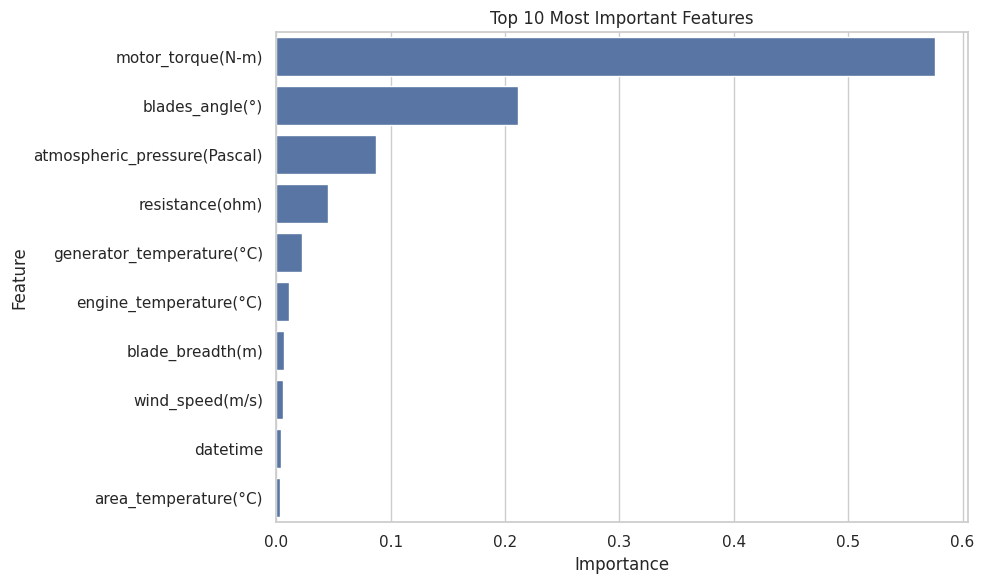

In [48]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns


# Identify categorical columns
categorical_cols = ['turbine_status', 'cloud_level']

# Apply one-hot encoding to categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_data = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate encoded features with numerical features
# Drop original categorical columns from df first
df_numeric = df.drop(['windmill_generated_power(kW/h)', 'tracking_id', 'turbine_status', 'cloud_level'], axis=1)
X = pd.concat([df_numeric, encoded_df], axis=1)

# Convert 'datetime' column to numerical representation
X['datetime'] = X['datetime'].astype('int64') // 10**9

y = df['windmill_generated_power(kW/h)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply normalization to numerical features
numerical_cols = df_numeric.columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

# Replace original numerical columns in training and testing sets with scaled values
X_train[numerical_cols] = X_train_scaled
X_test[numerical_cols] = X_test_scaled

# Check and handle NaN values after scaling
print("Number of NaN values in X_train:", X_train.isna().sum().sum())
print("Number of NaN values in X_test:", X_test.isna().sum().sum())

# Option 1: Drop rows with NaN values
# X_train.dropna(inplace=True)
# X_test.dropna(inplace=True)
# y_train = y_train[X_train.index]  # Adjust y_train accordingly
# y_test = y_test[X_test.index]    # Adjust y_test accordingly

# Option 2: Impute NaN values (e.g., with mean)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

# Train a Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get feature importances
importances = model.feature_importances_
features = X.columns

# Create a DataFrame for visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Most Important Features')
save_fig("Top 10 Most Important Features")
plt.show()

In [49]:
importance_df.head(10)

Feature  Importance
7              motor_torque(N-m)    0.575739
4                blades_angle(°)    0.211771
9   atmospheric_pressure(Pascal)    0.087255
13               resistance(ohm)    0.045666
8      generator_temperature(°C)    0.022692
6         engine_temperature(°C)    0.010830
16              blade_breadth(m)    0.007167
1                wind_speed(m/s)    0.005973
0                       datetime    0.004405
10          area_temperature(°C)    0.003570

## Most Important Features Based On Correlation Matrix

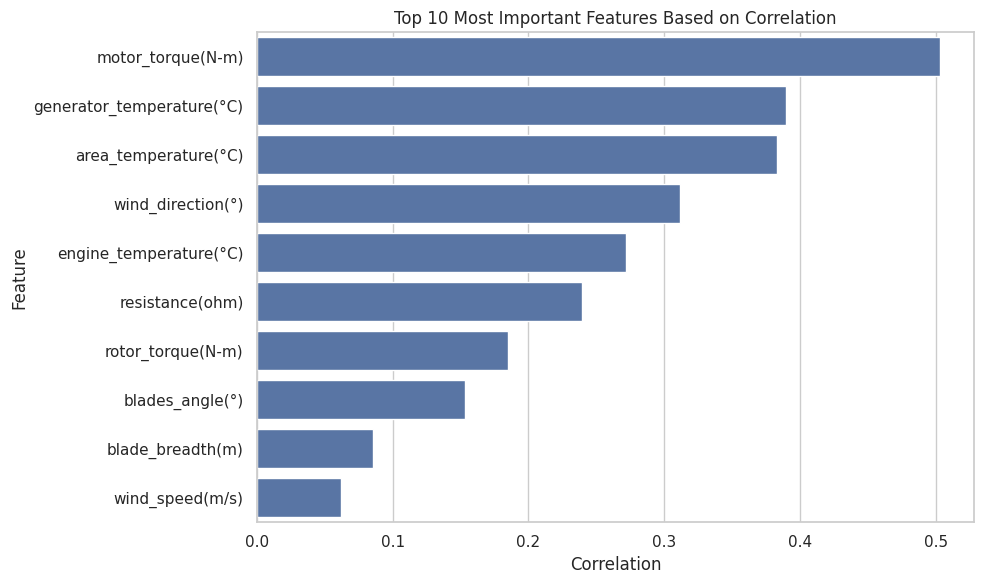

In [50]:
# Assuming 'generated_power_kw' is the target variable
target_variable = 'windmill_generated_power(kW/h)'

# Calculate the correlation matrix, excluding non-numeric columns
# Select only numeric columns for correlation calculation
numeric_df = df.select_dtypes(include=['number'])
correlation_matrix = numeric_df.corr()

# Get correlation values for the target variable
correlation_with_target = correlation_matrix[target_variable].drop(target_variable)

# Create a DataFrame for visualization
importance_df = correlation_with_target.abs().sort_values(ascending=False).reset_index()
importance_df.columns = ['Feature', 'Correlation']

# Plot the top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Correlation', y='Feature', data=importance_df.head(10))
plt.title('Top 10 Most Important Features Based on Correlation')
save_fig("Top 10 Most Important Features Based on Correlation")
plt.show()

## Model Train

In [51]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [52]:
# Identify categorical columns
categorical_cols = ['turbine_status', 'cloud_level']

# Apply one-hot encoding to categorical columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_data = encoder.fit_transform(df[categorical_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Concatenate encoded features with numerical features
# Drop original categorical columns from df first
df_numeric = df.drop(['windmill_generated_power(kW/h)', 'tracking_id', 'turbine_status', 'cloud_level'], axis=1)
X = pd.concat([df_numeric, encoded_df], axis=1)

# Convert 'datetime' column to numerical representation (e.g., Unix timestamp)
X['datetime'] = X['datetime'].astype('int64') // 10**9

y = df['windmill_generated_power(kW/h)']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Apply normalization to numerical features
numerical_cols = df_numeric.columns
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_cols])
X_test_scaled = scaler.transform(X_test[numerical_cols])

# Replace original numerical columns in training and testing sets with scaled values
X_train[numerical_cols] = X_train_scaled
X_test[numerical_cols] = X_test_scaled

# Check and handle NaN values after scaling
print("Number of NaN values in X_train:", X_train.isna().sum().sum())
print("Number of NaN values in X_test:", X_test.isna().sum().sum())

# Option 1: Drop rows with NaN values
# X_train.dropna(inplace=True)
# X_test.dropna(inplace=True)
# y_train = y_train[X_train.index]  # Adjust y_train accordingly
# y_test = y_test[X_test.index]    # Adjust y_test accordingly

# Option 2: Impute NaN values (e.g., with mean)
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test)

Number of NaN values in X_train: 0
Number of NaN values in X_test: 0


In [53]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.0 MB/s eta 0:00:00


In [54]:
from catboost import CatBoostRegressor

In [55]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Support Vector Regressor': SVR(),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'K-Neighbors': KNeighborsRegressor(n_neighbors=5),
    'CatBoostRegressor': CatBoostRegressor(iterations=100, learning_rate=0.1,verbose=False, depth=6, loss_function='RMSE', random_state=42)
}

# Dictionary to store model performance
performance = {}

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = model.predict(X_test)

    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # Store performance
    performance[model_name] = {'MSE': mse, 'MAE': mae, 'R2 Score': r2}

# Display performance of each model
performance_df = pd.DataFrame(performance).T
print(performance_df)

                               MSE       MAE  R2 Score
Linear Regression         4.237552  1.585079  0.432065
Random Forest Regressor   0.352166  0.325774  0.952801
Support Vector Regressor  2.062976  1.002725  0.723511
Gradient Boosting         0.442132  0.419548  0.940744
K-Neighbors               2.892978  1.295511  0.612271
CatBoostRegressor         0.417199  0.408115  0.944085


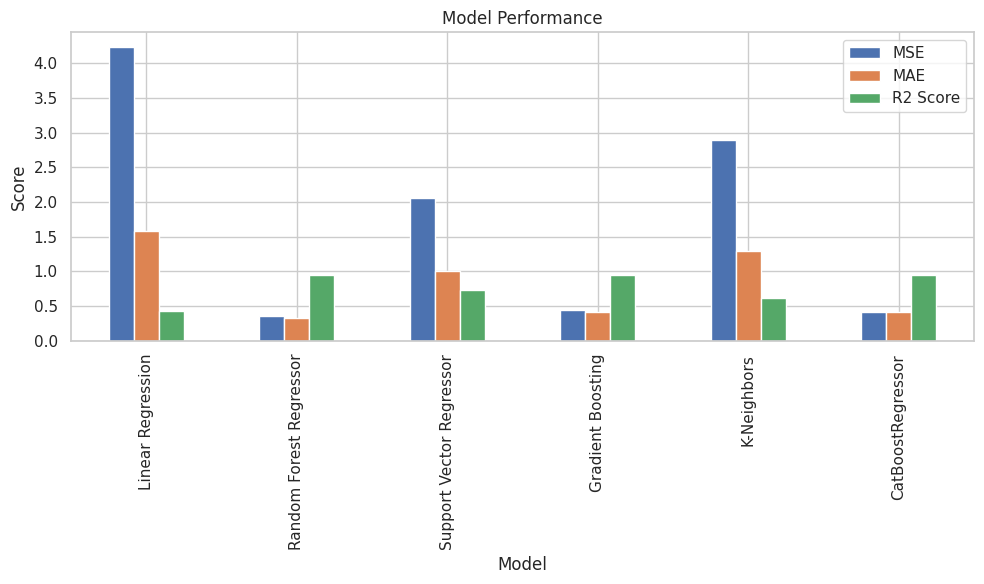

In [56]:
# Plot all mse mae and r2 score of models
performance_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Performance')
plt.xlabel('Model')
plt.ylabel('Score')
save_fig("Model Performance")
plt.show()

## K-Fold Corss Validation

In [57]:
from sklearn.metrics import make_scorer, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [58]:
# Define the models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'K-Neighbors': KNeighborsRegressor(n_neighbors=5),
    'Support Vector Regressor': SVR(),
    'Linear Regression': LinearRegression(),
    'CatBoostRegressor': CatBoostRegressor(iterations=100, verbose=False,learning_rate=0.1, depth=6, loss_function='RMSE', random_state=42)
}

# Define a custom scorer to calculate MSE, MAE, and R2 score
scorers = {
    'mse': make_scorer(mean_squared_error, greater_is_better=False),
    'mae': make_scorer(mean_absolute_error, greater_is_better=False),
    'r2': 'r2'
}

# Function to perform cross-validation
def cross_validate_models(models, X, y, cv=5):
    results = {}
    for name, model in models.items():
        results[name] = {}
        for scorer_name, scorer in scorers.items():
            score = cross_val_score(model, X, y, cv=cv, scoring=scorer)
            results[name][scorer_name] = -score.mean() if 'mse' in scorer_name or 'mae' in scorer_name else score.mean()
    return results

# Perform cross-validation
results = cross_validate_models(models,X_train,y_train, cv=5)

# Display the results
results_df = pd.DataFrame(results)
print(results_df)

     Random Forest  Gradient Boosting  K-Neighbors  Support Vector Regressor  \
mse       0.384220           0.437395     2.889519                  2.097435   
mae       0.331667           0.415822     1.289898                  1.000011   
r2        0.945988           0.938550     0.594236                  0.705423   

     Linear Regression  CatBoostRegressor  
mse           4.128794           0.410353  
mae           1.566552           0.402076  
r2            0.420127           0.942347  


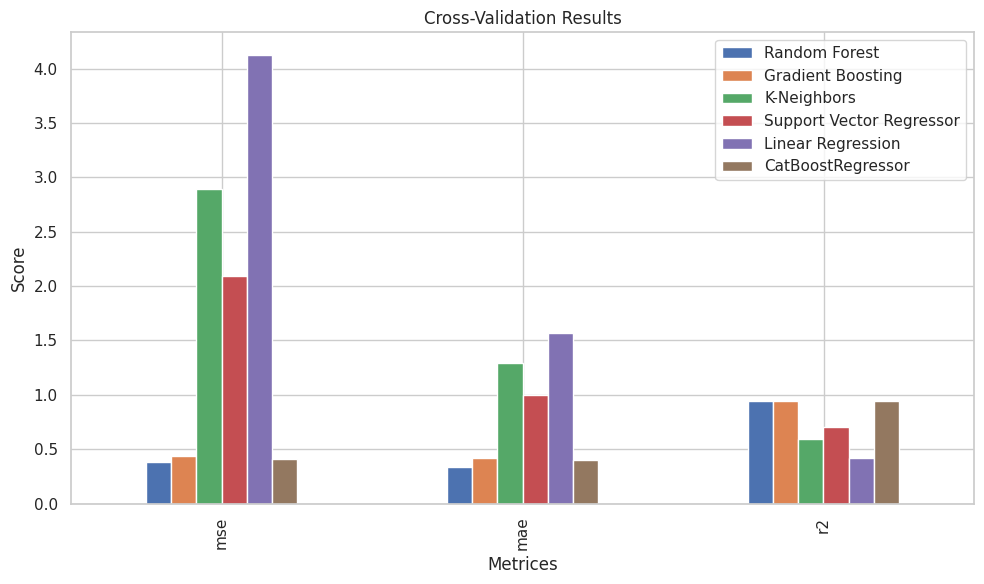

In [59]:
# Plot all the mse mae and r2 score
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Cross-Validation Results')
plt.xlabel('Metrices')
plt.ylabel('Score')
save_fig("Cross-Validation Results")
plt.show()

## Hyperparameter Tuning

In [60]:
from sklearn.model_selection import GridSearchCV

In [61]:
# Define the models and their hyperparameters
param_grid = {
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'max_features': ['auto', 'sqrt'],
            'max_depth': [None, 10, 20]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': [50, 100, 200],
            'learning_rate': [0.01, 0.1, 0.2],
            'max_depth': [3, 5, 7]
        }
    },
    'K-Neighbors': {
        'model': KNeighborsRegressor(),
        'params': {
            'n_neighbors': [3, 5, 7, 9],
            'weights': ['uniform', 'distance']
        }
    },
    'Support Vector Regressor': {
        'model': SVR(),
        'params': {
            'kernel': ['linear', 'poly', 'rbf'],
            'C': [0.1, 1, 10],
            'epsilon': [0.1, 0.2, 0.5]
        }
    },
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {
            'fit_intercept': [True, False],
        }
    },
    'CatBoostRegressor':{
        'model': CatBoostRegressor(random_state=42,verbose=False),
        'params': {
            'iterations': [100, 200, 300],
            'learning_rate': [0.01, 0.001, 0.1],
            'depth': [4, 6, 8]
        }
    }
}

# Perform GridSearchCV for each model
best_models = {}
for name, model_info in param_grid.items():
    grid_search = GridSearchCV(model_info['model'], model_info['params'], cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[name] = grid_search.best_estimator_
    print(f"Best parameters for {name}: {grid_search.best_params_}")

# Evaluate the best models
results = {}
for name, model in best_models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results[name] = {'MSE': mse, 'MAE': mae, 'R2': r2}

# Display the results
results_df = pd.DataFrame(results).T
print(results_df)

Best parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200}
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 200}
Best parameters for K-Neighbors: {'n_neighbors': 9, 'weights': 'distance'}
Best parameters for Support Vector Regressor: {'C': 10, 'epsilon': 0.5, 'kernel': 'rbf'}
Best parameters for Linear Regression: {'fit_intercept': False}
Best parameters for CatBoostRegressor: {'depth': 8, 'iterations': 300, 'learning_rate': 0.1}
                               MSE       MAE        R2
Random Forest             0.422544  0.377724  0.943369
Gradient Boosting         0.308694  0.323037  0.958628
K-Neighbors               2.737085  1.265830  0.633164
Support Vector Regressor  1.670192  0.913549  0.776154
Linear Regression         4.235872  1.585038  0.432290
CatBoostRegressor         0.334904  0.346686  0.955115


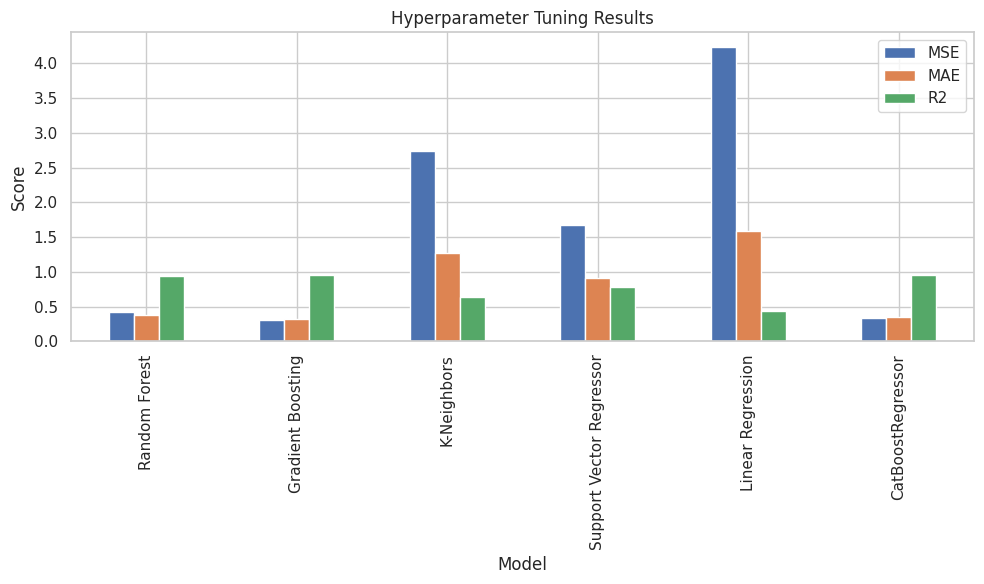

In [62]:
# Plot all the mse mae and r2 of Hyperparameter tuning
results_df.plot(kind='bar', figsize=(10, 6))
plt.title('Hyperparameter Tuning Results')
plt.xlabel('Model')
plt.ylabel('Score')
save_fig("Hyperparameter Tuning Results")
plt.show()

## Learning Curve

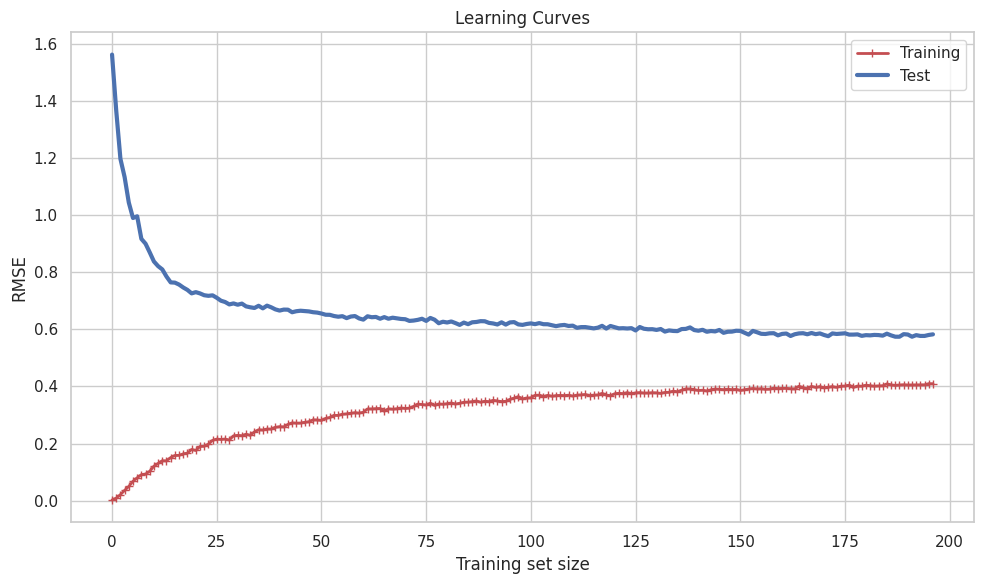

In [63]:
# Record training and test errors
train_errors, test_errors = [], []

# Train the model with increasing training set sizes and record errors
for m in range(100, len(X_train), 100):  # Start from a larger slice to avoid constant features
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_test_predict = model.predict(X_test)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    test_errors.append(mean_squared_error(y_test, y_test_predict))

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="Training")
plt.plot(np.sqrt(test_errors), "b-", linewidth=3, label="Test")
plt.xlabel('Training set size')
plt.ylabel('RMSE')
plt.title('Learning Curves')
plt.legend()
save_fig("Learning Curves")
plt.show()